<a href="https://colab.research.google.com/github/thuongvan23/XAI-LandCover/blob/kienNB/lime12bands_bigearthnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd

# Đường dẫn tới thư mục chứa ảnh (đã giải nén)
data_dir_1 = "/kaggle/input/bigearthnet-12band-10m/content/bigearthnet_12band_10m"
data_dir_2 = "/kaggle/input/bigearthnet-12band-10m-1/content/bigearthnet_12band_10m_1"
# Đường dẫn đến file metadata.parquet đã giải nén
parquet_path = '/kaggle/input/bigearthnetv2-reference-maps/metadata.parquet'

# Đọc file parquet
df = pd.read_parquet(parquet_path)

print(df.columns)

Index(['patch_id', 'labels', 'split', 'country', 's1_name', 's2v1_name',
       'contains_seasonal_snow', 'contains_cloud_or_shadow'],
      dtype='object')


In [ ]:
dir1 = "/kaggle/input/bigearthnet-12band-10m/content/bigearthnet_12band_10m"
dir2 = "/kaggle/input/bigearthnet-12band-10m-1/content/bigearthnet_12band_10m_1"

# Lấy tên các class (tên thư mục con) từ cả 2 thư mục
classes_1 = set(os.listdir(dir1))
classes_2 = set(os.listdir(dir2))

all_classes = sorted(classes_1.union(classes_2))


print("Tổng số class:", len(all_classes))
print("Danh sách class:")
for c in all_classes:
    print(c)

Tổng số class: 20
Danh sách class:
S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP
S2A_MSIL2A_20170613T101031_N9999_R022_T34VER
S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU
S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK
S2A_MSIL2A_20170704T112111_N9999_R037_T29SND
S2A_MSIL2A_20170717T113321_N9999_R080_T29UPA
S2A_MSIL2A_20170717T113321_N9999_R080_T29UPV
S2A_MSIL2A_20170720T100031_N9999_R122_T34UDG
S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR
S2A_MSIL2A_20170813T112121_N9999_R037_T29SNC
S2A_MSIL2A_20170818T103021_N9999_R108_T32TMT
S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL
S2A_MSIL2A_20170905T095031_N9999_R079_T35WPN
S2A_MSIL2A_20171002T094031_N9999_R036_T34TCR
S2A_MSIL2A_20171002T094031_N9999_R036_T34TCS
S2A_MSIL2A_20171002T112111_N9999_R037_T29SNB
S2A_MSIL2A_20171002T112111_N9999_R037_T29SNC
S2A_MSIL2A_20171015T095031_N9999_R079_T33UXP
S2A_MSIL2A_20171101T094131_N9999_R036_T35VNJ
S2A_MSIL2A_20171101T094131_N9999_R036_T35VNK


In [ ]:
df["labels"][15]

array(['Arable land', 'Broad-leaved forest', 'Inland waters', 'Pastures',
       'Urban fabric'], dtype=object)

In [ ]:
from collections import Counter
from itertools import chain

# Chuỗi các nhãn được gộp thành 1 danh sách lớn (flattened list)
all_labels = list(chain.from_iterable(df['labels']))

# Đếm tần suất xuất hiện của từng nhãn
label_counts = Counter(all_labels)

# In ra số nhãn duy nhất
print("Số lượng nhãn duy nhất:", len(label_counts))

# In ra danh sách và số lần xuất hiện
print("\nTần suất xuất hiện của từng nhãn:")
for label, count in label_counts.most_common():
    print(f"{label:40s}: {count}")

Số lượng nhãn duy nhất: 19

Tần suất xuất hiện của từng nhãn:
Arable land                             : 188025
Mixed forest                            : 165780
Coniferous forest                       : 154941
Transitional woodland, shrub            : 141150
Broad-leaved forest                     : 135928
Land principally occupied by agriculture, with significant areas of natural vegetation: 122709
Complex cultivation patterns            : 99598
Pastures                                : 95605
Urban fabric                            : 63758
Inland waters                           : 63212
Marine waters                           : 61832
Agro-forestry areas                     : 33181
Permanent crops                         : 29588
Inland wetlands                         : 20919
Moors, heathland and sclerophyllous vegetation: 13894
Natural grassland and sparsely vegetated areas: 11882
Industrial or commercial units          : 11142
Coastal wetlands                        : 1397
Beaches, du

In [ ]:
import pandas as pd
import numpy as np

# Đọc file metadata.parquet
parquet_path = '/kaggle/input/bigearthnetv2-reference-maps/metadata.parquet'
df = pd.read_parquet(parquet_path)

# Danh sách 19 lớp chuẩn
class_list = [
    'Arable land',
    'Mixed forest',
    'Coniferous forest',
    'Transitional woodland, shrub',
    'Broad-leaved forest',
    'Land principally occupied by agriculture, with significant areas of natural vegetation',
    'Complex cultivation patterns',
    'Pastures',
    'Urban fabric',
    'Inland waters',
    'Marine waters',
    'Agro-forestry areas',
    'Permanent crops',
    'Inland wetlands',
    'Moors, heathland and sclerophyllous vegetation',
    'Natural grassland and sparsely vegetated areas',
    'Industrial or commercial units',
    'Coastal wetlands',
    'Beaches, dunes, sands'
]

# Tạo ánh xạ từ tên nhãn sang chỉ số
label_to_idx = {label: i for i, label in enumerate(class_list)}

# Hàm chuyển danh sách nhãn thành vector 19 chiều
def encode_labels(label_list):
    vec = np.zeros(len(class_list), dtype=int)
    for label in label_list:
        if label in label_to_idx:
            vec[label_to_idx[label]] = 1
    return vec.tolist()

# Ghi đè cột 'labels' bằng vector 19 chiều (multi-hot)
df['labels'] = df['labels'].apply(encode_labels)

# Kiểm tra kết quả
print(df.head())

# (Tùy chọn) Lưu lại file parquet hoặc CSV
df.to_parquet('metadata_multilabel_encoded.parquet')

                                            patch_id  \
0  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
1  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
2  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
3  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   
4  S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...   

                                              labels split  country  \
0  [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...  test  Austria   
1  [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
2  [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
3  [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   
4  [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...  test  Austria   

                                        s1_name  \
0  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57   
1  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55   
2  S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56   
3  S1B_IW_GRDH_1SDV_20170612T165

In [ ]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [ ]:
import os

# Danh sách thư mục chứa dataset
data_dirs = [
    "/kaggle/input/bigearthnet-12band-10m/content/bigearthnet_12band_10m",
    "/kaggle/input/bigearthnet-12band-10m-1/content/bigearthnet_12band_10m_1"
]

class_counts = {}
total_images = 0

for data_dir in data_dirs:
    for label in sorted(os.listdir(data_dir)):
        class_path = os.path.join(data_dir, label)
        if os.path.isdir(class_path):
            n_files = len([f for f in os.listdir(class_path) if f.endswith('.tif')])
            if label not in class_counts:
                class_counts[label] = 0
            class_counts[label] += n_files
            total_images += n_files

# In kết quả
print("Số lượng ảnh mỗi class (gộp cả 2 dataset):")
for label, count in class_counts.items():
    print(f"Class {label}: {count} ảnh")

print(f"\nTổng số ảnh: {total_images}")

Số lượng ảnh mỗi class (gộp cả 2 dataset):
Class S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP: 3305 ảnh
Class S2A_MSIL2A_20170613T101031_N9999_R022_T34VER: 6686 ảnh
Class S2A_MSIL2A_20170617T113321_N9999_R080_T29UPU: 7986 ảnh
Class S2A_MSIL2A_20170701T093031_N9999_R136_T35VPK: 7997 ảnh
Class S2A_MSIL2A_20170704T112111_N9999_R037_T29SND: 8216 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPA: 370 ảnh
Class S2A_MSIL2A_20170717T113321_N9999_R080_T29UPV: 6013 ảnh
Class S2A_MSIL2A_20170720T100031_N9999_R122_T34UDG: 1540 ảnh
Class S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20170813T112121_N9999_R037_T29SNC: 8222 ảnh
Class S2A_MSIL2A_20170818T103021_N9999_R108_T32TMT: 4888 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35VNL: 8229 ảnh
Class S2A_MSIL2A_20170905T095031_N9999_R079_T35WPN: 2292 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCR: 4864 ảnh
Class S2A_MSIL2A_20171002T094031_N9999_R036_T34TCS: 627 ảnh
Class S2A_MSIL2A_20171002T112111_N9999_R037_

In [ ]:
df['labels']

0         [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
1         [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
2         [1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3         [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
4         [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, ...
                                ...                        
480033    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480034    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480035    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480036    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
480037    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: labels, Length: 480038, dtype: object

In [ ]:
!pip install rasterio

Shape của ảnh S2A_MSIL2A_20170818T103021_N9999_R108_T32TMT_20_36_12band.tif: (12, 120, 120) (channels, height, width)


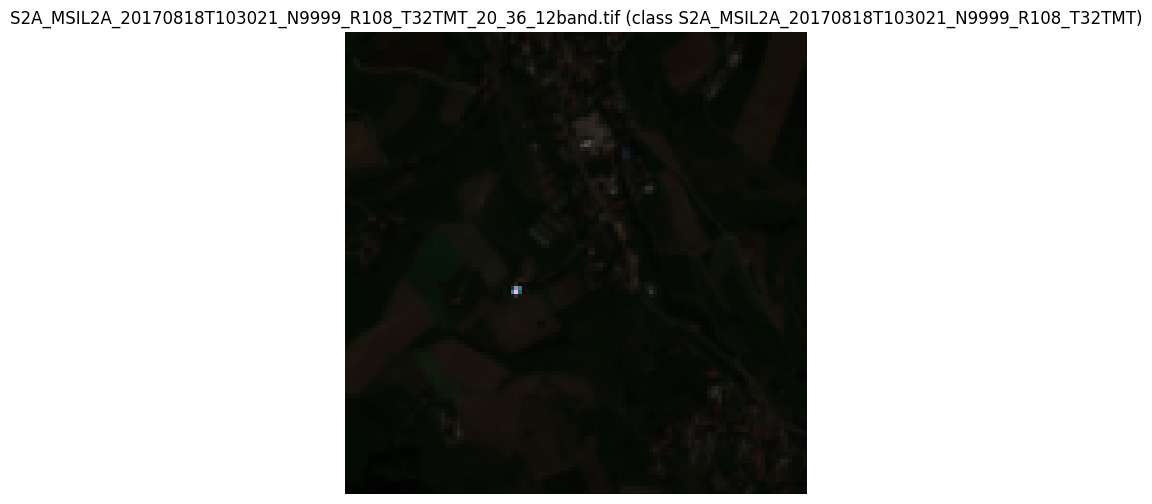

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import random

# Chọn ngẫu nhiên 1 class và 1 ảnh trong class
random_class = random.choice(os.listdir(data_dir))
img_path = os.path.join(data_dir, random_class)
random_img = random.choice([f for f in os.listdir(img_path) if f.endswith('.tif')])
img_full_path = os.path.join(img_path, random_img)

# Đọc ảnh
with rasterio.open(img_full_path) as src:
    img = src.read()  # shape: (12, H, W)

# In shape
print(f"Shape của ảnh {random_img}: {img.shape} (channels, height, width)")

# Hiển thị ảnh (dùng band 4,3,2 tương ứng RGB)
rgb = np.stack([img[3], img[2], img[1]], axis=-1)  # Chú ý chỉ số bắt đầu từ 0
rgb = rgb.astype(np.float32)
rgb /= np.max(rgb) + 1e-6  # Chuẩn hóa để hiển thị

plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"{random_img} (class {random_class})")
plt.axis('off')
plt.show()

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from glob import glob

# 1. Danh sách thư mục chứa ảnh
IMAGE_DIRS = [
    "/kaggle/input/bigearthnet-12band-10m/content/bigearthnet_12band_10m",
    "/kaggle/input/bigearthnet-12band-10m-1/content/bigearthnet_12band_10m_1"
]


# 2. Đọc metadata chứa patch_id và labels
# df = pd.read_parquet('/kaggle/input/bigearthnetv2-reference-maps/metadata.parquet')

# 3. Gộp toàn bộ ảnh từ nhiều thư mục
tif_paths = []
for image_dir in IMAGE_DIRS:
    tif_paths.extend(glob(os.path.join(image_dir, "*", "*_12band.tif")))

# 4. Tạo ánh xạ patch_id → đường dẫn ảnh
patch_to_path = {
    os.path.basename(path).replace("_12band.tif", ""): path
    for path in tif_paths
}

# 5. Giữ lại các patch_id có ảnh thật sự
df = df[df['patch_id'].isin(patch_to_path)]

# 6. Gán cột image_path theo ánh xạ tìm được
df['image_path'] = df['patch_id'].map(patch_to_path)

# 7. Chia ngẫu nhiên train/val/test (70/15/15)
train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42, shuffle=True)
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, random_state=42)

# 8. Tạo danh sách (image_path, labels)
train_list = list(zip(train_df['image_path'], train_df['labels']))
val_list = list(zip(val_df['image_path'], val_df['labels']))
test_list = list(zip(test_df['image_path'], test_df['labels']))

# 9. In kết quả
print(f"Số ảnh train: {len(train_list)}")
print(f"Số ảnh val:   {len(val_list)}")
print(f"Số ảnh test:  {len(test_list)}")

Số ảnh train: 71741
Số ảnh val:   15377
Số ảnh test:  15374


In [ ]:
len(tif_paths)

112210

In [ ]:
train_list[0]

('/kaggle/input/bigearthnet-12band-10m/content/bigearthnet_12band_10m/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR/S2A_MSIL2A_20170803T094031_N9999_R036_T34TCR_64_29_12band.tif',
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Kiểm tra những ảnh KHÔNG có trong metadata
tif_patch_ids = set([os.path.basename(p).replace('_12band.tif', '') for p in tif_paths])
metadata_patch_ids = set(df['patch_id'].tolist())

missing_from_metadata = tif_patch_ids - metadata_patch_ids
print(f"Số ảnh KHÔNG có metadata: {len(missing_from_metadata)}")

Số ảnh KHÔNG có metadata: 9718


In [ ]:
# Số ảnh thực sự trong thư mục
print("Tổng số file ảnh .tif:", len(tif_paths))

# Số patch_id có metadata
print("Tổng số patch_id trong metadata:", len(df))

# Số ảnh tồn tại đồng thời cả trong thư mục và metadata
common_ids = set(df['patch_id']).intersection(set(patch_to_path))
print("Số patch_id khớp được cả metadata và ảnh:", len(common_ids))

Tổng số file ảnh .tif: 112210
Tổng số patch_id trong metadata: 102492
Số patch_id khớp được cả metadata và ảnh: 102492


In [ ]:
!pip install albumentations

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose([
    # A.Normalize(mean=[0]*12, std=[1]*12, max_pixel_value=1.0),

    A.Resize(244, 224),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(mean=0.0, std=1.0, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=True),
])

val_transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=[0]*12, std=[1]*12, max_pixel_value=1.0),
    ToTensorV2(transpose_mask=False)
])

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/usr/local/lib/python3.11/dist-packages/albumentations/augmentations/pixel/transforms.py:228: RuntimeWarning: divide by zero encountered in reciprocal
  self.denominator = np.reciprocal(


In [ ]:
from torch.utils.data import Dataset
import torch
import numpy as np
import rasterio  # dùng rasterio chứ không cần tifffile nếu bạn dùng .open()

class BigEarthNetDataset(Dataset):
    def __init__(self, data_list, transform=None):
        self.data_list = data_list  # List of (img_path, label_list)
        self.transform = transform

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        img_path, label = self.data_list[idx]

        with rasterio.open(img_path) as src:
            image = src.read()  # (13, H, W)

        image = image.astype(np.float32) / 10000.0
        image = np.transpose(image, (1, 2, 0))  # (H, W, C)

        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        else:
            image = torch.tensor(np.transpose(image, (2, 0, 1)), dtype=torch.float32)

        # Chuyển label thành Tensor float cho multi-label
        label = torch.tensor(label, dtype=torch.float32)

        return image, label

In [ ]:
from torch.utils.data import DataLoader

# Batch size
BATCH_SIZE = 64

# Dataset
train_dataset = BigEarthNetDataset(train_list, transform=train_transform)
val_dataset = BigEarthNetDataset(val_list, transform=val_transform)
test_dataset = BigEarthNetDataset(test_list, transform=val_transform)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Label Tensor: tensor([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0.])
Shape: torch.Size([19])
Non-zero class indices: [0, 4, 7, 11]
Non-zero class count: 4.0


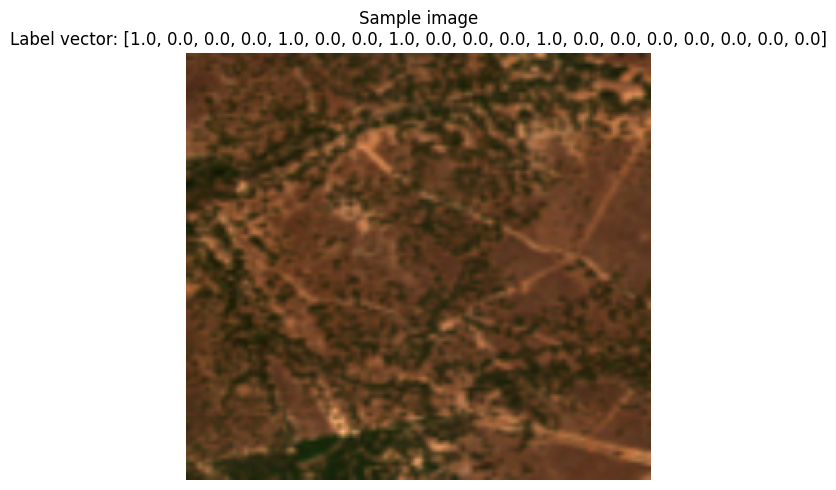

In [ ]:
# Lấy 1 mẫu bất kỳ từ train_dataset
sample_img, sample_label = train_dataset[1]

#Kiểm tra thông tin label
print("Label Tensor:", sample_label)
print("Shape:", sample_label.shape)
print("Non-zero class indices:", torch.nonzero(sample_label).squeeze().tolist())
print("Non-zero class count:", torch.sum(sample_label).item())

# Chuyển tensor về numpy để hiển thị
sample_img_np = sample_img.numpy().transpose(1, 2, 0)  # (H, W, C)

# Lấy lại các band RGB (band 4, 3, 2 --> index 3, 2, 1)
rgb = sample_img_np[:, :, [3, 2, 1]]

# Chuẩn hóa về [0, 1] nếu cần (nếu bạn đã normalize thì giá trị có thể lệch)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)

# Hiển thị ảnh
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title(f"Sample image\nLabel vector: {sample_label.tolist()}")
plt.axis("off")
plt.show()

In [ ]:
pip install efficientnet_pytorch

Note: you may need to restart the kernel to use updated packages.


Using device: cpu
Model loaded and moved to cpu
True Labels (binary vector):
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [ -1.00353  -3.16369  -5.11462  -6.15549  -5.14274  -3.34869  -0.38706
   0.16501   0.20137   7.24471 -10.38685 -10.01695  -6.70208  -5.73178
 -10.20974  -9.01686  -4.88785 -16.30918 -12.2108 ]
Sigmoid(Logits):
 [0.26825 0.04056 0.00597 0.00212 0.00581 0.03394 0.40443 0.54116 0.55017
 0.99929 0.00003 0.00004 0.00123 0.00323 0.00004 0.00012 0.00748 0.
 0.     ]
Predicted Labels:
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


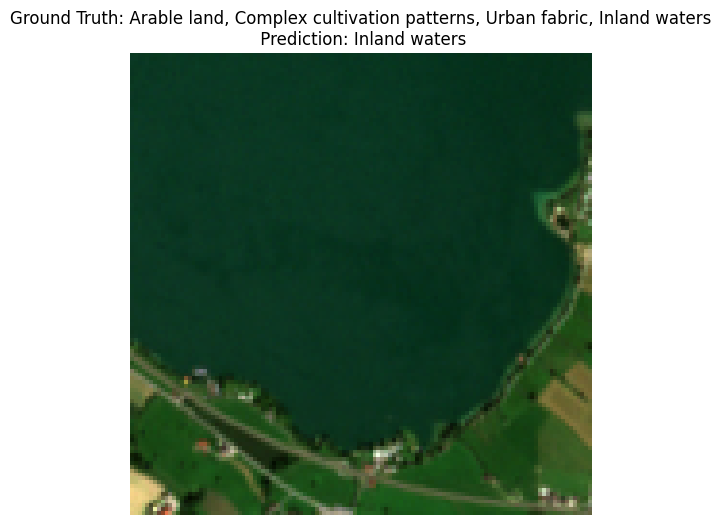

True Labels (binary vector):
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [ -0.63112  -3.72049  -3.96177  -4.07642  -3.82099  -1.79321  -1.73293
   3.92627   6.27321  -5.71256  -7.13894 -10.78632  -6.40784  -3.13153
  -4.8581   -5.26688  -2.04497  -5.79414  -7.35099]
Sigmoid(Logits):
 [0.34726 0.02365 0.01867 0.01669 0.02144 0.14268 0.15021 0.98066 0.99812
 0.00329 0.00079 0.00002 0.00165 0.04183 0.00771 0.00513 0.11456 0.00304
 0.00064]
Predicted Labels:
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]


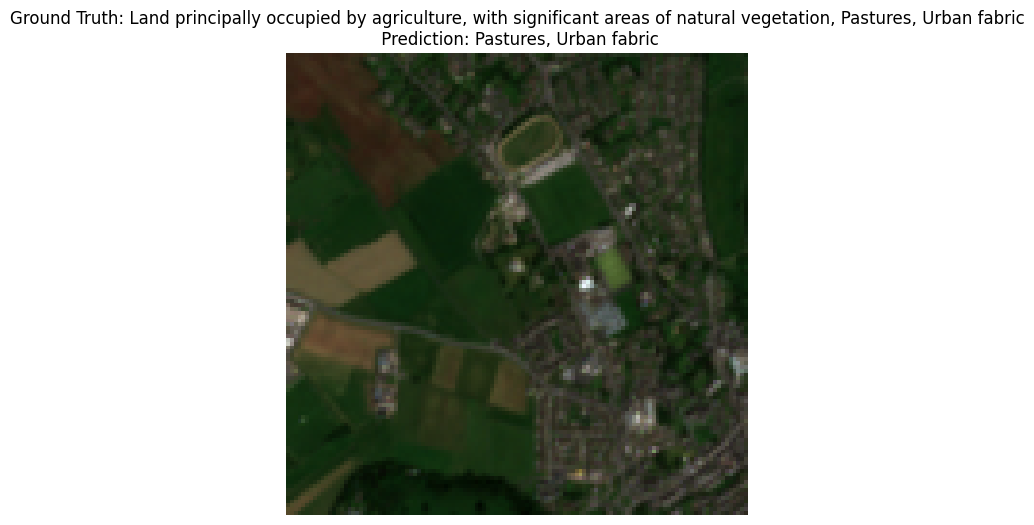

True Labels (binary vector):
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [  5.51516  -3.93149  -7.9316   -5.6465    5.15996  -0.95325  -3.17816
  -4.87255   7.7998   -5.66655 -23.20754 -16.92367  -2.2389   -9.55634
 -14.57193  -8.93375  -4.02307 -20.39011 -32.60024]
Sigmoid(Logits):
 [0.99599 0.01924 0.00036 0.00352 0.99429 0.27823 0.04    0.0076  0.99959
 0.00345 0.      0.      0.09631 0.00007 0.      0.00013 0.01758 0.
 0.     ]
Predicted Labels:
 [1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


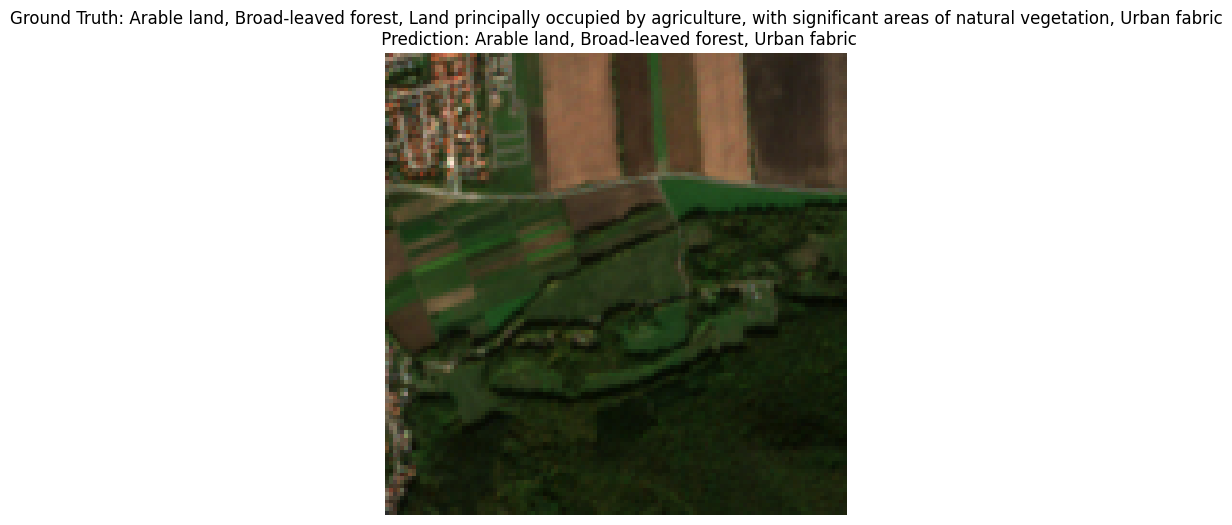

True Labels (binary vector):
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [ -5.02008   1.85696   5.26421  -0.508    -3.8402   -4.23791 -12.64146
 -13.28127  -8.62761  -3.72572 -12.21113 -14.89173 -13.98076  -5.25785
 -15.68808 -15.99572 -10.37475 -17.17752 -19.58798]
Sigmoid(Logits):
 [0.00656 0.86494 0.99485 0.37566 0.02104 0.01423 0.      0.      0.00018
 0.02353 0.      0.      0.      0.00518 0.      0.      0.00003 0.
 0.     ]
Predicted Labels:
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


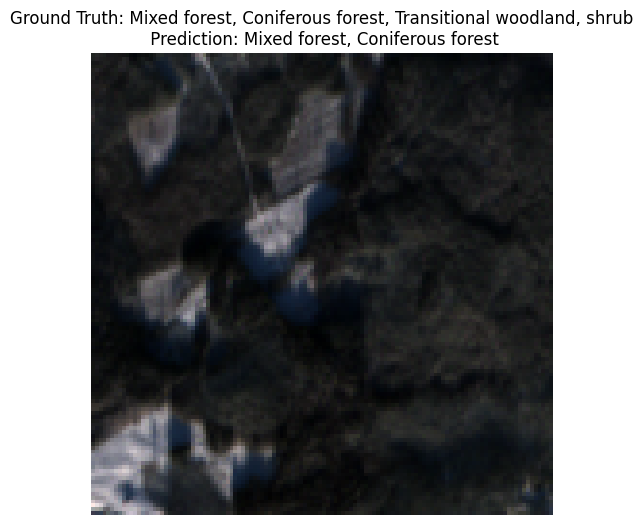

True Labels (binary vector):
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [ 11.79372 -14.11049 -14.99229  -5.99128  -7.45529  -6.31996  -6.73765
  -8.57481  -8.04874  -9.24316 -22.66353 -13.81466  -7.59607  -8.17
 -16.86072 -11.26116  -6.66397 -30.24043 -29.19648]
Sigmoid(Logits):
 [0.99999 0.      0.      0.00249 0.00058 0.0018  0.00118 0.00019 0.00032
 0.0001  0.      0.      0.0005  0.00028 0.      0.00001 0.00127 0.
 0.     ]
Predicted Labels:
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


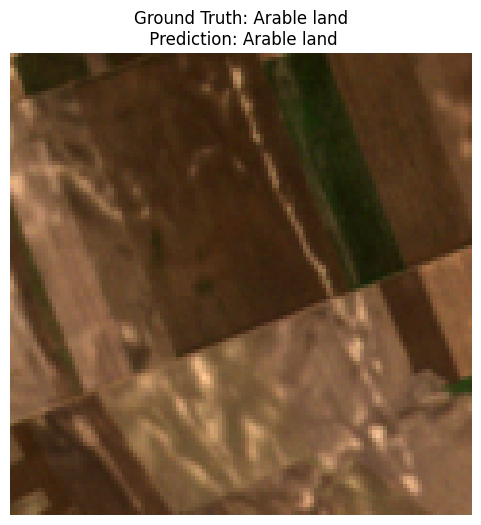

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import random

# Luôn dùng CPU
device = torch.device("cpu")
print("Using device:", device)

# Load model EfficientNet đã huấn luyện (trên CPU)
model_path = "/kaggle/input/efficientnet-v3/t-capstone-process-bigearth-nhan-efficientnet-v3.pth"
model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()
print("Model loaded and moved to", device)

# Danh sách class BigEarthNet
class_list = [
    'Arable land',
    'Mixed forest',
    'Coniferous forest',
    'Transitional woodland, shrub',
    'Broad-leaved forest',
    'Land principally occupied by agriculture, with significant areas of natural vegetation',
    'Complex cultivation patterns',
    'Pastures',
    'Urban fabric',
    'Inland waters',
    'Marine waters',
    'Agro-forestry areas',
    'Permanent crops',
    'Inland wetlands',
    'Moors, heathland and sclerophyllous vegetation',
    'Natural grassland and sparsely vegetated areas',
    'Industrial or commercial units',
    'Coastal wetlands',
    'Beaches, dunes, sands'
]

# Hàm hiển thị prediction
def show_sample_prediction(dataset, index):
    image, true_labels = dataset[index]
    input_tensor = image.unsqueeze(0).to(device)  # (1, C, H, W)

    np.set_printoptions(suppress=True, precision=5)
    # Dự đoán
    with torch.no_grad():
        output = model(input_tensor)
        sigmoid_probs = torch.sigmoid(output.squeeze()).cpu().numpy()
        predicted = (sigmoid_probs > 0.8).astype(int)  # Sửa chỗ này

    # Hiển thị ma trận nhãn gốc và predicted
    print("True Labels (binary vector):\n", true_labels.numpy())
    print("Logits:\n", output.squeeze().cpu().numpy())
    print("Sigmoid(Logits):\n", np.array2string(sigmoid_probs, precision=5, suppress_small=True))
    print("Predicted Labels:\n", predicted)

    # Lấy tên nhãn
    true_label_names = [class_list[i] for i, val in enumerate(true_labels) if val == 1]
    predicted_label_names = [class_list[i] for i, val in enumerate(predicted) if val == 1]

    # Hiển thị ảnh (chọn RGB bands 4,3,2)
    img_np = image.cpu().numpy().transpose(1, 2, 0)
    rgb = img_np[:, :, [3, 2, 1]]  # Bands 4,3,2
    rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)  # Scale về [0,1]

    plt.figure(figsize=(6, 6))
    plt.imshow(rgb)
    plt.axis('off')
    plt.title("Ground Truth: {}\n Prediction: {}".format(", ".join(true_label_names), ", ".join(predicted_label_names)))
    plt.show()

# Hiển thị 5 mẫu random từ test_dataset
for _ in range(5):
    idx = random.randint(0, len(test_dataset) - 1)
    show_sample_prediction(test_dataset, idx)

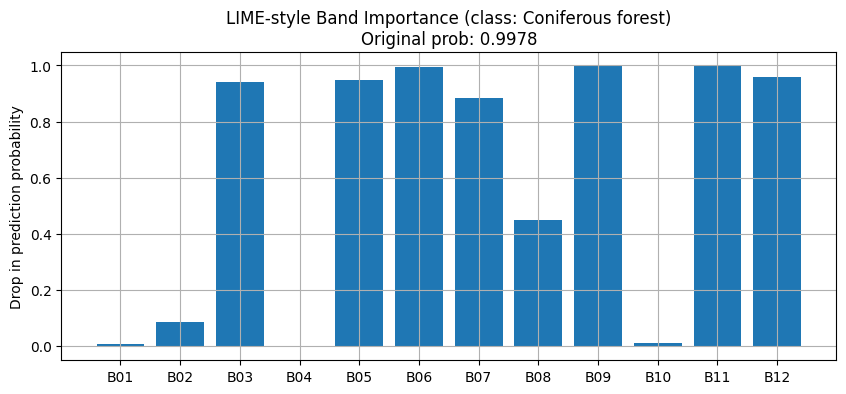

Ground truth labels: ['Coniferous forest', 'Inland waters', 'Inland wetlands']
Target class explained: Coniferous forest
Band importance values:
 [ 0.00719  0.08685  0.942   -0.00117  0.94937  0.99285  0.88224  0.4503
  0.99698  0.01059  0.99672  0.95975]


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# ✅ Hàm: che band (gán về 0 hoặc giá trị trung bình)
def mask_band(image, band_idx, method='zero'):
    masked = image.clone()
    if method == 'zero':
        masked[band_idx] = 0
    elif method == 'mean':
        masked[band_idx] = image[band_idx].mean()
    return masked

# ✅ Hàm: tính tầm quan trọng từng band
def compute_band_importance(model, image, true_labels, target_class=None, method='zero'):
    model.eval()
    image = image.to(device)

    # Lấy xác suất dự đoán ban đầu (cho nhãn mục tiêu)
    with torch.no_grad():
        original_logits = model(image.unsqueeze(0))
        original_probs = torch.sigmoid(original_logits.squeeze()).cpu().numpy()

    # Nếu chưa chỉ định nhãn, lấy nhãn đầu tiên trong ground-truth
    if target_class is None:
        target_class = torch.where(true_labels == 1)[0][0].item()

    base_prob = original_probs[target_class]

    importances = []
    for band_idx in range(image.shape[0]):
        masked = mask_band(image, band_idx, method=method)
        with torch.no_grad():
            logits = model(masked.unsqueeze(0))
            probs = torch.sigmoid(logits.squeeze()).cpu().numpy()
            drop = base_prob - probs[target_class]
            importances.append(drop)

    return np.array(importances), target_class, base_prob

# ✅ Hàm: hiển thị kết quả LIME-like
def show_band_importance(model, dataset, index, method='zero'):
    image, label = dataset[index]
    importances, target_class, base_prob = compute_band_importance(model, image, label, method=method)

    band_names = [f'B{i+1:02d}' for i in range(image.shape[0])]
    plt.figure(figsize=(10, 4))
    plt.bar(band_names, importances)
    plt.ylabel('Drop in prediction probability')
    plt.title(f'LIME-style Band Importance (class: {class_list[target_class]})\nOriginal prob: {base_prob:.4f}')
    plt.grid(True)
    plt.show()

    print("Ground truth labels:", [class_list[i] for i, v in enumerate(label) if v == 1])
    print("Target class explained:", class_list[target_class])
    print("Band importance values:\n", importances)
show_band_importance(model, test_dataset, index=0)

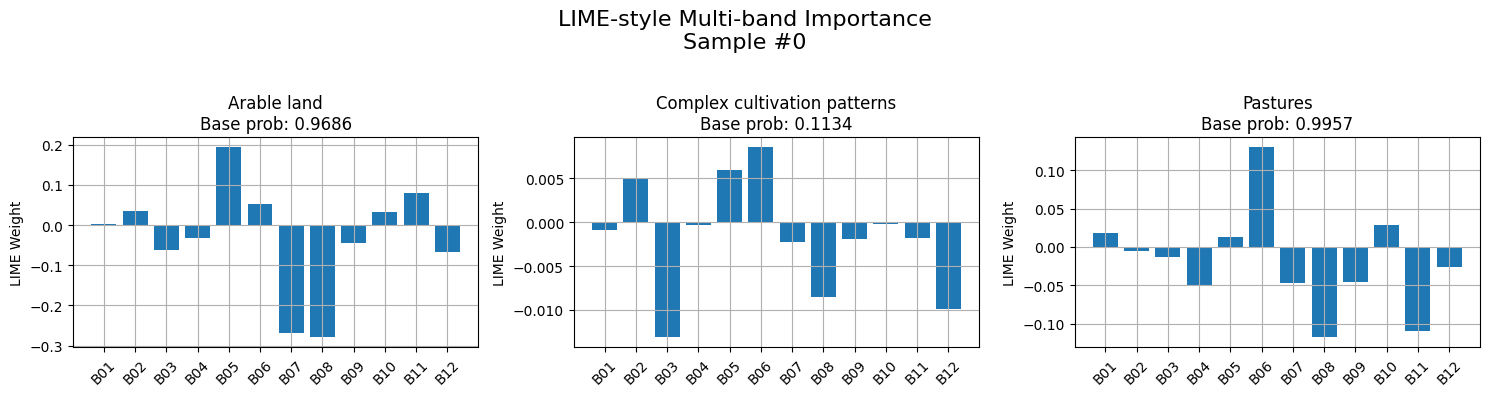

Ground truth labels: ['Arable land', 'Complex cultivation patterns', 'Pastures']


In [ ]:
import torch
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

def lime_multi_band_importance(model, image, true_label, target_class=None, num_samples=500, method='zero'):
    model.eval()
    image = image.to(device)

    # Nếu không chỉ định class → lấy nhãn đầu tiên trong ground truth
    if target_class is None:
        target_class = torch.where(true_label == 1)[0][0].item()

    # Dự đoán xác suất gốc
    with torch.no_grad():
        base_prob = torch.sigmoid(model(image.unsqueeze(0)))[0, target_class].item()

    C = image.shape[0]  # số bands, ví dụ 12
    masks = []
    probs = []

    for _ in range(num_samples):
        # Mask vector: 1 giữ nguyên, 0 là che
        band_mask = np.random.randint(0, 2, size=C)
        masked_image = image.clone()

        for i in range(C):
            if band_mask[i] == 0:
                if method == 'zero':
                    masked_image[i] = 0
                elif method == 'mean':
                    masked_image[i] = image[i].mean()

        with torch.no_grad():
            prob = torch.sigmoid(model(masked_image.unsqueeze(0)))[0, target_class].item()

        masks.append(band_mask)
        probs.append(prob)

    # Chuyển về array
    masks = np.array(masks)  # shape (num_samples, C)
    probs = np.array(probs)  # shape (num_samples,)

    # Tính Y: chênh lệch xác suất so với gốc (giảm bao nhiêu)
    y = base_prob - probs

    # Hồi quy tuyến tính (Ridge để ổn định)
    reg = Ridge(alpha=1.0)
    reg.fit(masks, y)
    band_importances = reg.coef_

    return band_importances, target_class, base_prob
def show_lime_multi_band(model, dataset, index, num_samples=500, method='zero', class_indices=None):
    image, label = dataset[index]

    # Nếu không chỉ định, giải thích cho tất cả nhãn ground-truth
    if class_indices is None:
        class_indices = torch.where(label == 1)[0].tolist()

    band_names = [f'B{i+1:02d}' for i in range(image.shape[0])]
    n_classes = len(class_indices)
    n_cols = min(n_classes, 3)
    n_rows = (n_classes + n_cols - 1) // n_cols

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, class_idx in enumerate(class_indices):
        importances, _, base_prob = lime_multi_band_importance(model, image, label, target_class=class_idx,
                                                                num_samples=num_samples, method=method)
        plt.subplot(n_rows, n_cols, i + 1)
        plt.bar(band_names, importances)
        plt.title(f"{class_list[class_idx]}\nBase prob: {base_prob:.4f}")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.ylabel("LIME Weight")

    plt.suptitle(f"LIME-style Multi-band Importance\nSample #{index}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    print("Ground truth labels:", [class_list[i] for i, v in enumerate(label) if v == 1])
show_lime_multi_band(model, test_dataset, index=0)

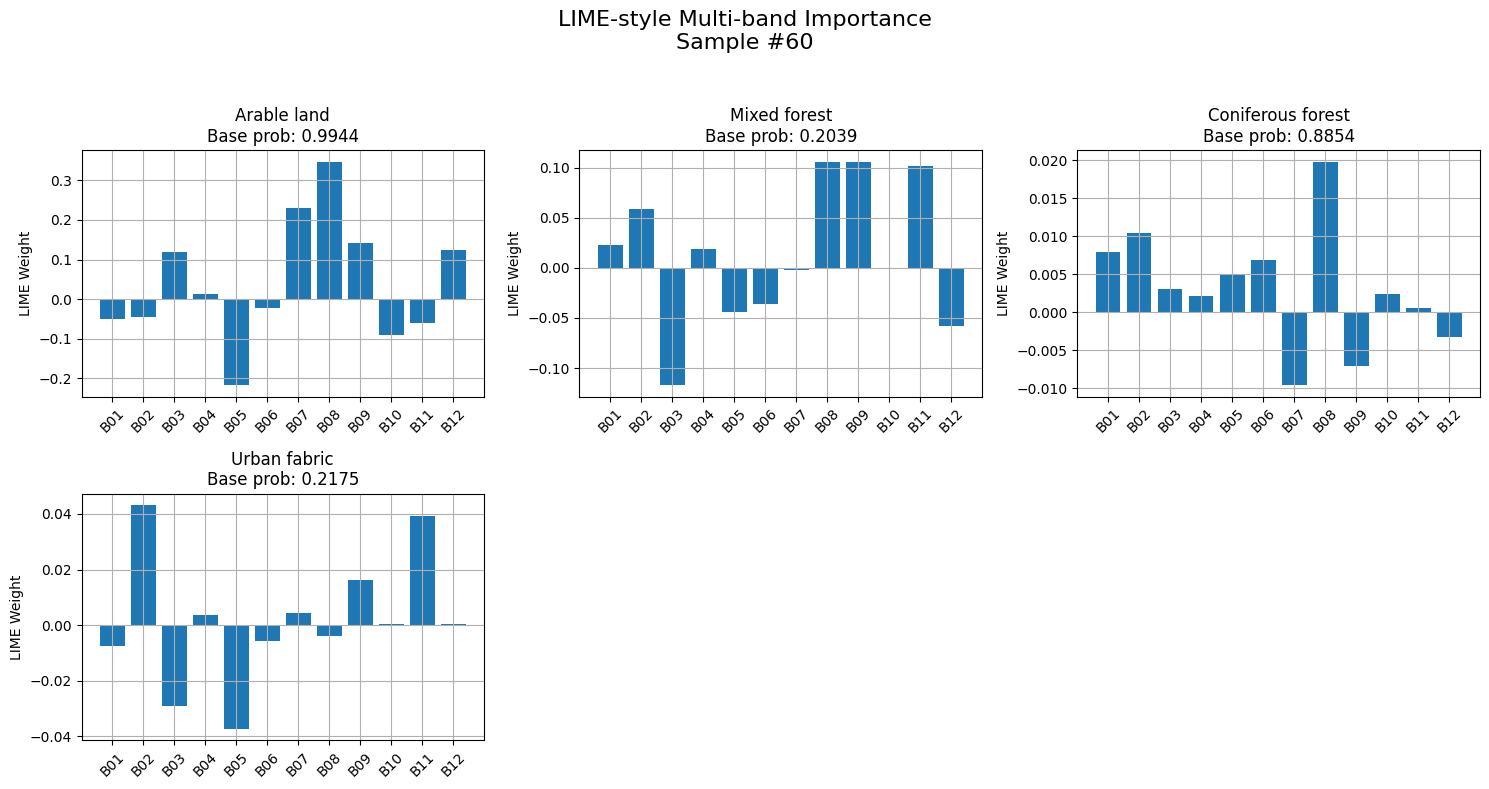

Ground truth labels: ['Arable land', 'Mixed forest', 'Coniferous forest', 'Urban fabric']


In [ ]:
import torch
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

model_path = "/kaggle/input/efficientnet-v3/t-capstone-process-bigearth-nhan-efficientnet-v3.pth"
model = torch.load(model_path, map_location=device, weights_only=False)
def lime_multi_band_importance(model, image, true_label, target_class=None, num_samples=2000, method='zero'):
    model.eval()
    image = image.to(device)

    # Nếu không chỉ định class → lấy nhãn đầu tiên trong ground truth
    if target_class is None:
        target_class = torch.where(true_label == 1)[0][0].item()

    # Dự đoán xác suất gốc
    with torch.no_grad():
        base_prob = torch.sigmoid(model(image.unsqueeze(0)))[0, target_class].item()

    C = image.shape[0]  # số bands, ví dụ 12
    masks = []
    probs = []

    for _ in range(num_samples):
        # Mask vector: 1 giữ nguyên, 0 là che
        band_mask = np.random.randint(0, 2, size=C)
        masked_image = image.clone()

        for i in range(C):
            if band_mask[i] == 0:
                if method == 'zero':
                    masked_image[i] = 0
                elif method == 'mean':
                    masked_image[i] = image[i].mean()

        with torch.no_grad():
            prob = torch.sigmoid(model(masked_image.unsqueeze(0)))[0, target_class].item()

        masks.append(band_mask)
        probs.append(prob)

    # Chuyển về array
    masks = np.array(masks)  # shape (num_samples, C)
    probs = np.array(probs)  # shape (num_samples,)

    # Tính Y: chênh lệch xác suất so với gốc (giảm bao nhiêu)
    y = probs

    # Hồi quy tuyến tính (Ridge để ổn định)
    reg = Ridge(alpha=1.0)
    reg.fit(masks, y)
    band_importances = reg.coef_

    return band_importances, target_class, base_prob
def show_lime_multi_band(model, dataset, index, num_samples=2000, method='zero', class_indices=None):
    image, label = dataset[index]

    # Nếu không chỉ định, giải thích cho tất cả nhãn ground-truth
    if class_indices is None:
        class_indices = torch.where(label == 1)[0].tolist()

    band_names = [f'B{i+1:02d}' for i in range(image.shape[0])]
    n_classes = len(class_indices)
    n_cols = min(n_classes, 3)
    n_rows = (n_classes + n_cols - 1) // n_cols

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, class_idx in enumerate(class_indices):
        importances, _, base_prob = lime_multi_band_importance(model, image, label, target_class=class_idx,
                                                                num_samples=num_samples, method=method)
        plt.subplot(n_rows, n_cols, i + 1)
        plt.bar(band_names, importances)
        plt.title(f"{class_list[class_idx]}\nBase prob: {base_prob:.4f}")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.ylabel("LIME Weight")

    plt.suptitle(f"LIME-style Multi-band Importance\nSample #{index}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    print("Ground truth labels:", [class_list[i] for i, v in enumerate(label) if v == 1])
show_lime_multi_band(model, test_dataset, index=60)

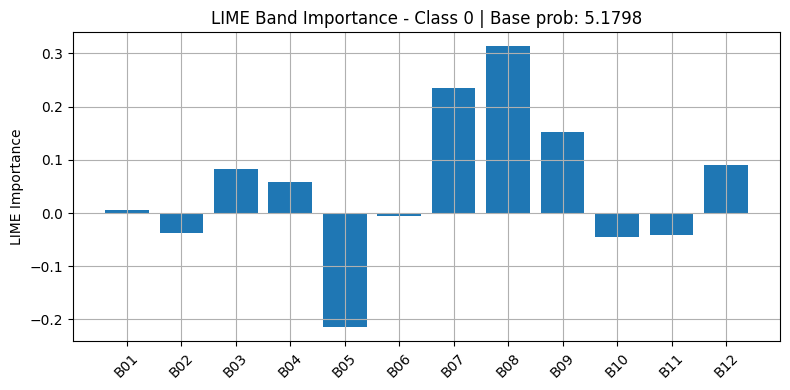

Ground truth labels: [0, 1, 2, 8]


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ======= Load model gốc ========
model_path = "/kaggle/input/efficientnet-v3/t-capstone-process-bigearth-nhan-efficientnet-v3.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()

# ======= Wrapper: chỉ dự đoán cho 1 class ========
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        out = self.base_model(x)
        return out[:, self.class_idx].unsqueeze(-1)  # (batch_size, 1)

# ======= LIME-style XAI cho 1 class ========
def lime_multi_band_importance_class_model(class_model, image, num_samples=200, method='zero'):
    class_model.eval()
    image = image.to(device)

    with torch.no_grad():
        base_prob = torch.sigmoid(class_model(image.unsqueeze(0)))[0].item()
        # base_prob = (class_model(image.unsqueeze(0)))[0].item()
    C = image.shape[0]
    masks = []
    probs = []

    for _ in range(num_samples):
        band_mask = np.random.randint(0, 2, size=C)
        masked_image = image.clone()

        for i in range(C):
            if band_mask[i] == 0:
                if method == 'zero':
                    masked_image[i] = 0
                elif method == 'mean':
                    masked_image[i] = image[i].mean()

        with torch.no_grad():
            prob = torch.sigmoid(class_model(masked_image.unsqueeze(0)))[0].item()

        masks.append(band_mask)
        probs.append(prob)

    masks = np.array(masks)
    probs = np.array(probs)

    # y = np.clip(base_prob - probs, 0, None)  # chỉ học từ phần giảm
    y= probs

    reg = LinearRegression()
    reg.fit(masks, y)
    band_importances = reg.coef_

    return band_importances, base_prob
def show_lime_single_class(base_model, dataset, index, class_idx, num_samples=500, method='zero'):
    image, label = dataset[index]
    band_names = [f'B{i+1:02d}' for i in range(image.shape[0])]

    # Tạo model wrapper cho class cụ thể
    class_model = MultiLabelModel(base_model, class_idx).to(device)

    importances, base_prob = lime_multi_band_importance_class_model(class_model, image,
                                                                     num_samples=num_samples,
                                                                     method=method)

    # Vẽ biểu đồ
    plt.figure(figsize=(8, 4))
    plt.bar(band_names, importances)
    plt.title(f"LIME Band Importance - Class {class_idx} | Base prob: {base_prob:.4f}")
    plt.xticks(rotation=45)
    plt.ylabel("LIME Importance")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("Ground truth labels:", [i for i, v in enumerate(label) if v == 1])
# Ví dụ: giải thích sample số 5823 cho class 0
show_lime_single_class(model, test_dataset, index=60, class_idx=0)

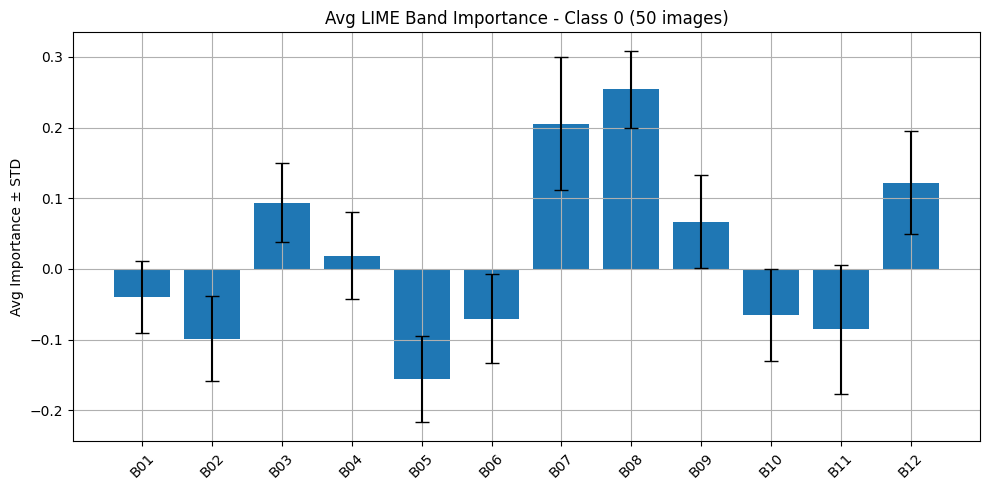

Số ảnh dùng: 50
Mean base prob: 3.4491


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ======= Load model ========
model_path = "/kaggle/input/efficientnet-v3/t-capstone-process-bigearth-nhan-efficientnet-v3.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()

# ======= Wrapper cho 1 class ========
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        out = self.base_model(x)
        return out[:, self.class_idx].unsqueeze(-1)  # (batch_size, 1)

# ======= LIME cho 1 ảnh, 1 class ========
def lime_multi_band_importance_class_model(class_model, image, num_samples=200, method='zero'):
    class_model.eval()
    image = image.to(device)

    with torch.no_grad():
        base_prob = (class_model(image.unsqueeze(0)))[0].item()

    C = image.shape[0]
    masks = []
    probs = []

    for _ in range(num_samples):
        band_mask = np.random.randint(0, 2, size=C)
        masked_image = image.clone()

        for i in range(C):
            if band_mask[i] == 0:
                if method == 'zero':
                    masked_image[i] = 0
                elif method == 'mean':
                    masked_image[i] = image[i].mean()

        with torch.no_grad():
            prob = torch.sigmoid(class_model(masked_image.unsqueeze(0)))[0].item()

        masks.append(band_mask)
        probs.append(prob)

    masks = np.array(masks)
    probs = np.array(probs)
    y = probs

    reg = LinearRegression()
    reg.fit(masks, y)
    band_importances = reg.coef_

    return band_importances, base_prob

# ======= Tổng quát hoá LIME cho nhiều ảnh cùng class ========
def lime_summary_for_class(base_model, dataset, class_idx, max_images=50, num_samples=200, method='zero'):
    class_model = MultiLabelModel(base_model, class_idx).to(device)
    class_model.eval()

    importances_list = []
    base_probs = []
    count = 0

    for i in range(len(dataset)):
        image, label = dataset[i]

        # Kiểm tra ảnh có chứa class không
        if label[class_idx] != 1:
            continue

        band_importances, base_prob = lime_multi_band_importance_class_model(
            class_model, image, num_samples=num_samples, method=method
        )
        importances_list.append(band_importances)
        base_probs.append(base_prob)

        count += 1
        if count >= max_images:
            break

    if not importances_list:
        print(f"Không tìm thấy ảnh nào có class {class_idx}")
        return

    importances_array = np.stack(importances_list, axis=0)
    mean_importance = np.mean(importances_array, axis=0)
    std_importance = np.std(importances_array, axis=0)
    band_names = [f'B{i+1:02d}' for i in range(mean_importance.shape[0])]

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 5))
    plt.bar(band_names, mean_importance, yerr=std_importance, capsize=5)
    plt.title(f"Avg LIME Band Importance - Class {class_idx} ({count} images)")
    plt.xticks(rotation=45)
    plt.ylabel("Avg Importance ± STD")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Số ảnh dùng: {count}")
    print(f"Mean base prob: {np.mean(base_probs):.4f}")

# ======= Chạy ví dụ: Tổng quát hoá cho class 0 ========
# Nhớ định nghĩa `test_dataset` trước khi gọi
# test_dataset = ... (nên là dạng torch Dataset, gồm (image, label))

lime_summary_for_class(model, test_dataset, class_idx=0, max_images=50, num_samples=200)


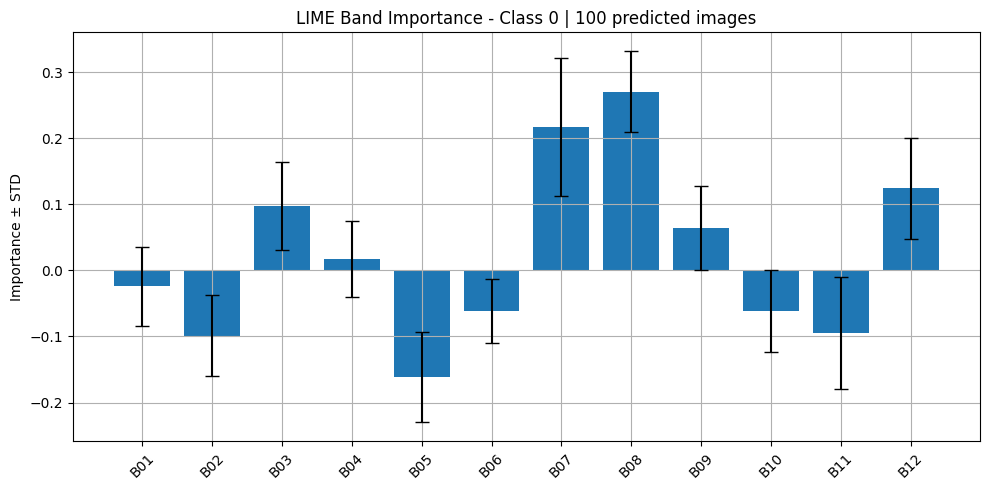

Số ảnh dự đoán class 0: 100
Mean base prob: 0.9114


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ======= Load model ========
model_path = "/kaggle/input/efficientnet-v3/t-capstone-process-bigearth-nhan-efficientnet-v3.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()

# ======= Wrapper cho 1 class ========
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        out = self.base_model(x)
        return out[:, self.class_idx].unsqueeze(-1)  # (batch_size, 1)

# ======= LIME cho 1 ảnh, 1 class ========
def lime_multi_band_importance_class_model(class_model, image, num_samples=200, method='zero'):
    class_model.eval()
    image = image.to(device)

    with torch.no_grad():
        base_prob = torch.sigmoid(class_model(image.unsqueeze(0)))[0].item()

    C = image.shape[0]
    masks = []
    probs = []

    for _ in range(num_samples):
        band_mask = np.random.randint(0, 2, size=C)
        masked_image = image.clone()

        for i in range(C):
            if band_mask[i] == 0:
                if method == 'zero':
                    masked_image[i] = 0
                elif method == 'mean':
                    masked_image[i] = image[i].mean()

        with torch.no_grad():
            prob = torch.sigmoid(class_model(masked_image.unsqueeze(0)))[0].item()

        masks.append(band_mask)
        probs.append(prob)

    masks = np.array(masks)
    probs = np.array(probs)
    y = probs

    reg = LinearRegression()
    reg.fit(masks, y)
    band_importances = reg.coef_

    return band_importances, base_prob

# ======= Tổng quát hoá LIME cho nhiều ảnh được model dự đoán có class ========
def lime_summary_for_predicted_class(base_model, dataset, class_idx, max_images=100, num_samples=200, method='zero'):
    class_model = MultiLabelModel(base_model, class_idx).to(device)
    class_model.eval()

    importances_list = []
    base_probs = []
    count = 0

    for i in range(len(dataset)):
        image, label = dataset[i]
        image = image.to(device).unsqueeze(0)

        with torch.no_grad():
            output = torch.sigmoid(base_model(image))[0]
            pred_prob = output[class_idx].item()

        if pred_prob <= 0.5:
            continue  # Chỉ lấy ảnh model dự đoán class_idx > 0.5

        band_importances, base_prob = lime_multi_band_importance_class_model(
            class_model, image.squeeze(0), num_samples=num_samples, method=method
        )
        importances_list.append(band_importances)
        base_probs.append(base_prob)

        count += 1
        if count >= max_images:
            break

    if not importances_list:
        print(f"Không tìm thấy ảnh nào mà mô hình dự đoán class {class_idx}")
        return

    importances_array = np.stack(importances_list, axis=0)
    mean_importance = np.mean(importances_array, axis=0)
    std_importance = np.std(importances_array, axis=0)
    band_names = [f'B{i+1:02d}' for i in range(mean_importance.shape[0])]

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 5))
    plt.bar(band_names, mean_importance, yerr=std_importance, capsize=5)
    plt.title(f"LIME Band Importance - Class {class_idx} | {count} predicted images")
    plt.xticks(rotation=45)
    plt.ylabel("Importance ± STD")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Số ảnh dự đoán class {class_idx}: {count}")
    print(f"Mean base prob: {np.mean(base_probs):.4f}")

# ======= Gọi hàm cho class 0 ========
lime_summary_for_predicted_class(
    base_model=model,
    dataset=test_dataset,
    class_idx=0,
    max_images=100,
    num_samples=200,
    method='zero'
)

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# ======= Load model ========
model_path = "/kaggle/input/efficientnet-v3/t-capstone-process-bigearth-nhan-efficientnet-v3.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()

# ======= Wrapper cho 1 class ========
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        out = self.base_model(x)
        return out[:, self.class_idx].unsqueeze(-1)  # (batch_size, 1)

# ======= LIME cho 1 ảnh, 1 class ========
def lime_multi_band_importance_class_model(class_model, image, num_samples=500, method='zero'):
    class_model.eval()
    image = image.to(device)

    with torch.no_grad():
        base_prob = torch.sigmoid(class_model(image.unsqueeze(0)))[0].item()

    C = image.shape[0]
    masks = []
    probs = []

    for _ in range(num_samples):
        band_mask = np.random.randint(0, 2, size=C)
        masked_image = image.clone()

        for i in range(C):
            if band_mask[i] == 0:
                if method == 'zero':
                    masked_image[i] = 0
                elif method == 'mean':
                    masked_image[i] = image[i].mean()

        with torch.no_grad():
            prob = torch.sigmoid(class_model(masked_image.unsqueeze(0)))[0].item()

        masks.append(band_mask)
        probs.append(prob)

    masks = np.array(masks)
    probs = np.array(probs)
    y = probs

    reg = LinearRegression()
    reg.fit(masks, y)
    band_importances = reg.coef_

    return band_importances, base_prob

# ======= Tổng quát hoá LIME cho nhiều ảnh được model dự đoán có class ========
def lime_summary_for_predicted_class(base_model, dataset, class_idx, max_images=1000, num_samples=500, method='zero'):
    class_model = MultiLabelModel(base_model, class_idx).to(device)
    class_model.eval()

    importances_list = []
    base_probs = []
    count = 0

    for i in range(len(dataset)):
        image, label = dataset[i]
        image = image.to(device).unsqueeze(0)

        with torch.no_grad():
            output = torch.sigmoid(base_model(image))[0]
            pred_prob = output[class_idx].item()

        if pred_prob <= 0.5:
            continue  # Chỉ lấy ảnh model dự đoán class_idx > 0.5

        band_importances, base_prob = lime_multi_band_importance_class_model(
            class_model, image.squeeze(0), num_samples=num_samples, method=method
        )
        importances_list.append(band_importances)
        base_probs.append(base_prob)

        count += 1
        if count >= max_images:
            break

    if not importances_list:
        print(f"Không tìm thấy ảnh nào mà mô hình dự đoán class {class_idx}")
        return

    importances_array = np.stack(importances_list, axis=0)
    mean_importance = np.mean(importances_array, axis=0)
    std_importance = np.std(importances_array, axis=0)
    band_names = [f'B{i+1:02d}' for i in range(mean_importance.shape[0])]

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 5))
    plt.bar(band_names, mean_importance, yerr=std_importance, capsize=5)
    plt.title(f"LIME Band Importance - Class {class_idx} | {count} predicted images")
    plt.xticks(rotation=45)
    plt.ylabel("Importance ± STD")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Số ảnh dự đoán class {class_idx}: {count}")
    print(f"Mean base prob: {np.mean(base_probs):.4f}")

# ======= Gọi hàm cho class 13 ========
lime_summary_for_predicted_class(
    base_model=model,
    dataset=test_dataset,
    # Đổi class_idx theo index của list nhãn
    class_idx=17,
    max_images=1000,
    num_samples=500,
    method='zero'
)

In [ ]:
import torch
import numpy as np
from sklearn.metrics import (
    classification_report, precision_recall_fscore_support, average_precision_score
)
from sklearn.metrics import (
    classification_report, multilabel_confusion_matrix, roc_auc_score,
    precision_recall_fscore_support, average_precision_score,
    hamming_loss, accuracy_score, precision_score, recall_score,
    f1_score, jaccard_score, roc_curve, precision_recall_curve, auc
)

# Giả sử test_loader và model đã có sẵn
# Class 0 là "Arable land", tương ứng index = 0
# class_list là danh sách tên lớp theo thứ tự

def evaluate_model_mask_band8(model, dataloader, device, threshold=0.5):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in dataloader:
            # Mask toàn bộ band 8 (index 7 vì bắt đầu từ 0)
            images[:, 6, :, :] = 0.0

            images = images.to(device)
            labels = labels.to(device)
            outputs = torch.sigmoid(model(images))

            all_preds.append(outputs.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    y_true = np.vstack(all_labels)
    y_scores = np.vstack(all_preds)
    y_pred = (y_scores >= threshold).astype(int)

    return y_true, y_scores, y_pred

# === Chạy đánh giá ===
y_true, y_scores, y_pred = evaluate_model_mask_band8(model, test_loader, device)

# === Đánh giá riêng class 0 (Arable land) ===
class_idx = 17  # class "Arable land"

# Precision, Recall, F1 cho class 0
precision_0 = precision_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
recall_0 = recall_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
f1_0 = f1_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
support_0 = int(np.sum(y_true[:, class_idx]))

# === In kết quả ===
print(f"\nClass 17 - {class_list[class_idx]}")
print(f"Precision: {precision_0:.2f}")
print(f"Recall:    {recall_0:.2f}")
print(f"F1-Score:  {f1_0:.2f}")
print(f"Support:   {support_0}")


Class 18 - Beaches, dunes, sands
Precision: 0.03
Recall:    0.45
F1-Score:  0.06
Support:   60


In [ ]:
import torch
import numpy as np
from lime import lime_image
from scipy.stats import spearmanr
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Thiết bị
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.eval()

# === Tìm ảnh đầu tiên có chứa class 0 ===
target_class = 0
target_image = None
target_label = None

for i in range(len(test_dataset)):
    image, label = test_dataset[i]
    if label[target_class] == 1:
        target_image = image
        target_label = label
        break

if target_image is None:
    raise ValueError("Không tìm thấy ảnh nào chứa class 0 trong tập test.")

# Chuẩn hóa lại ảnh: CHW → HWC cho LIME
image_np = target_image.numpy().transpose(1, 2, 0)
label_np = target_label.numpy()

# Thêm batch dimension cho tensor
image_tensor = target_image.unsqueeze(0).to(device)

# === LIME Explainer ===
explainer = lime_image.LimeImageExplainer()

# Hàm dự đoán cho LIME
def batch_predict(images_np):
    images_tensor = torch.tensor(images_np.transpose(0, 3, 1, 2)).float().to(device)
    outputs = model(images_tensor)
    return outputs.detach().cpu().numpy()

# === Giải thích bằng LIME ===
explanation = explainer.explain_instance(
    image_np,
    classifier_fn=batch_predict,
    top_labels=10,
    hide_color=0,
    num_samples=1000
)

# === Tính importance cho từng class ===
lime_class_importance = {}
for class_id in explanation.top_labels:
    _, mask = explanation.get_image_and_mask(
        class_id,
        positive_only=True,
        num_features=5,
        hide_rest=False
    )
    importance = np.sum(mask)
    lime_class_importance[class_id] = importance

# === Vector hóa importance (dạng 19 chiều) ===
n_classes = len(label_np)  # Ví dụ: 19
lime_importance_vector = np.zeros(n_classes)
for class_id, score in lime_class_importance.items():
    lime_importance_vector[class_id] = score

# === Vector nhãn ground truth: class nào có thì score = 1 ===
label_importance_vector = label_np.astype(float)

# === Tính Spearman rank correlation ===
spearman_corr, _ = spearmanr(lime_importance_vector, label_importance_vector)

print(f"✅ Spearman rank correlation = {spearman_corr:.4f}")

from skimage.segmentation import mark_boundaries

class_id_to_show = 0  # ví dụ: class 0

img_boundry, mask = explanation.get_image_and_mask(
    class_id=class_id_to_show,
    positive_only=True,
    num_features=5,
    hide_rest=False
)

plt.imshow(mark_boundaries(img_boundry, mask))
plt.title(f"LIME Explanation - Class {class_id_to_show}")
plt.axis("off")
plt.show()

ValueError: Only RGB images can be converted to Lab space.

**Chỉ chạy phần trên**

In [ ]:
!pip install shap

In [ ]:
!pip install timm==1.0.17 --upgrade

In [ ]:
import torch
import torch.nn as nn
import timm  # nếu bạn dùng mô hình từ timm

class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        # Load ViT Hybrid pretrained
        model = timm.create_model("vit_base_r50_s16_224", pretrained=True)

        # Sửa Conv2d đầu tiên của ResNet50 backbone để nhận 12 bands
        old_conv = model.patch_embed.backbone.stem[0]
        new_conv = nn.Conv2d(
            in_channels=12,
            out_channels=old_conv.out_channels,
            kernel_size=old_conv.kernel_size,
            stride=old_conv.stride,
            padding=old_conv.padding,
            bias=False
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
from torch.serialization import add_safe_globals
from timm.models.vision_transformer import VisionTransformer

# Bước 1: Cho phép VisionTransformer được load (nếu file chứa mô hình này)
add_safe_globals({'VisionTransformer': VisionTransformer})

# Bước 2: Load toàn bộ mô hình
model_path = "/kaggle/input/vit-for-bigearthnet-new/my_pytorch_model_bigearth_1.pth"
model = torch.load(model_path, map_location='cpu', weights_only=False)
model.eval()
print("✅ Mô hình ViT Hybrid đã khởi tạo và load trọng số.")

✅ Mô hình ViT Hybrid đã khởi tạo và load trọng số.


Using device: cpu
Model loaded and moved to cpu
True Labels (binary vector):
 [1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [0.94679 0.41246 0.85918 0.00562 0.00694 0.69705 0.7874  0.71571 0.70766
 0.05109 0.00056 0.00036 0.00146 0.01812 0.00109 0.00018 0.01077 0.00034
 0.00062]
Sigmoid(Logits):
 [0.72047 0.60168 0.70249 0.5014  0.50174 0.66753 0.68727 0.67166 0.66988
 0.51277 0.50014 0.50009 0.50036 0.50453 0.50027 0.50004 0.50269 0.50009
 0.50016]
Predicted Labels:
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


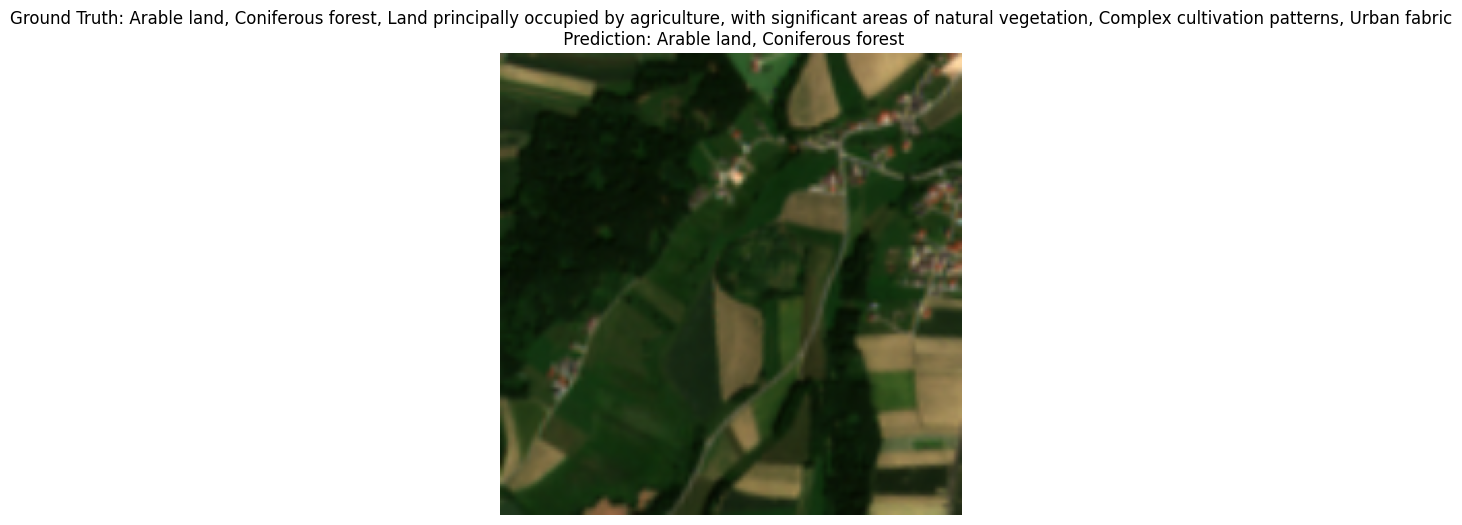

True Labels (binary vector):
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Logits:
 [0.00429 0.00191 0.01268 0.02809 0.00171 0.00283 0.00397 0.00539 0.00232
 0.00118 0.00852 0.0007  0.0028  0.96192 0.3889  0.26412 0.00122 0.00064
 0.00141]
Sigmoid(Logits):
 [0.50107 0.50048 0.50317 0.50702 0.50043 0.50071 0.50099 0.50135 0.50058
 0.50029 0.50213 0.50018 0.5007  0.72351 0.59602 0.56565 0.5003  0.50016
 0.50035]
Predicted Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


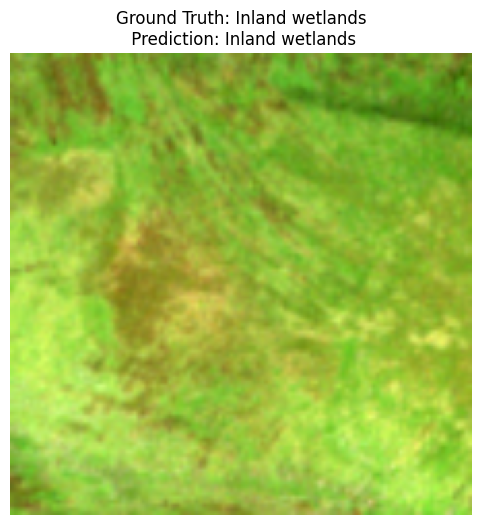

True Labels (binary vector):
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [0.01036 0.99349 0.85999 0.35477 0.01174 0.10419 0.00062 0.00038 0.01738
 0.0288  0.96222 0.00013 0.00019 0.0034  0.00016 0.00007 0.00269 0.00173
 0.00013]
Sigmoid(Logits):
 [0.50259 0.72978 0.70266 0.58777 0.50294 0.52602 0.50015 0.50009 0.50435
 0.5072  0.72357 0.50003 0.50005 0.50085 0.50004 0.50002 0.50067 0.50043
 0.50003]
Predicted Labels:
 [0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


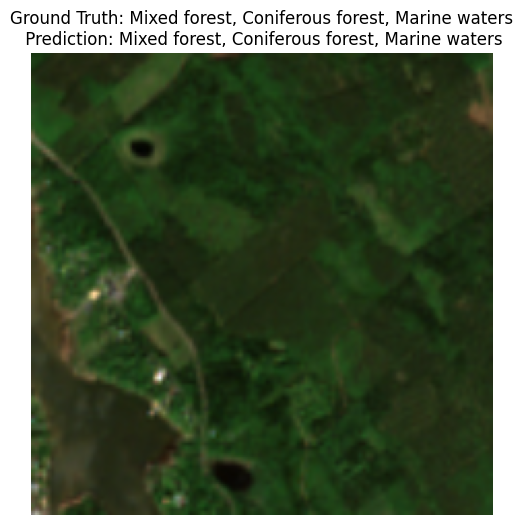

True Labels (binary vector):
 [0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [0.27758 0.08385 0.01741 0.48459 0.88306 0.09387 0.09168 0.20012 0.007
 0.00677 0.00018 0.84295 0.13027 0.00028 0.0188  0.01345 0.00233 0.0002
 0.00006]
Sigmoid(Logits):
 [0.56895 0.52095 0.50435 0.61883 0.70746 0.52345 0.5229  0.54986 0.50175
 0.50169 0.50005 0.69909 0.53252 0.50007 0.5047  0.50336 0.50058 0.50005
 0.50002]
Predicted Labels:
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


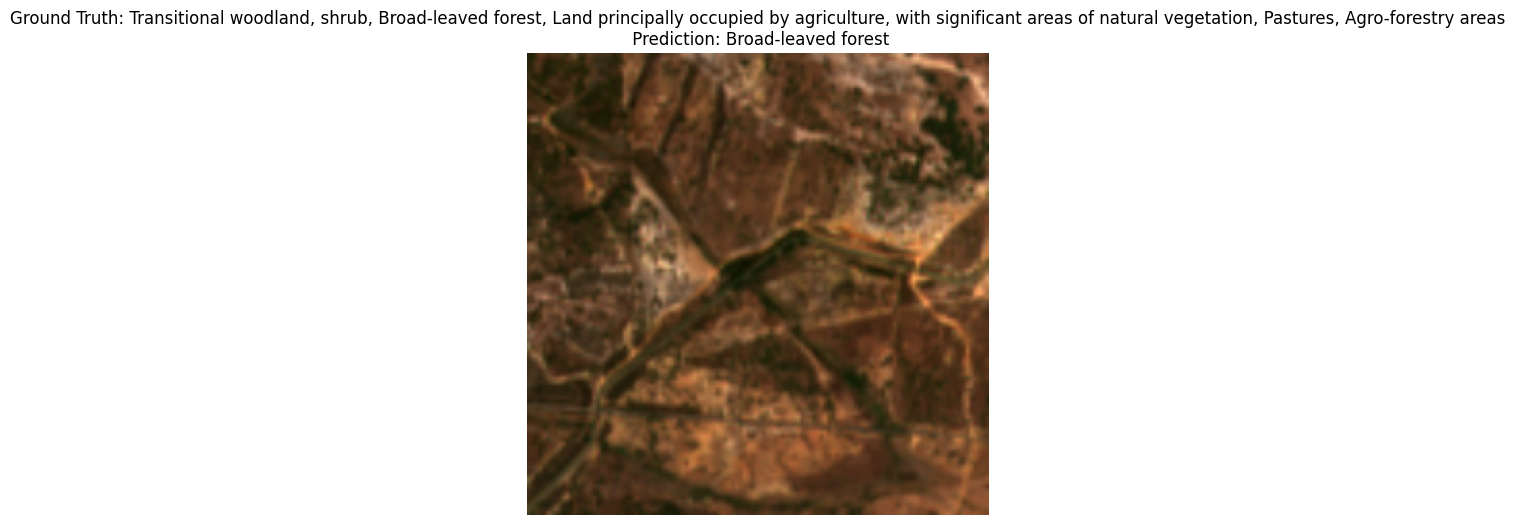

True Labels (binary vector):
 [1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [0.99818 0.26336 0.4605  0.00686 0.00434 0.88323 0.51089 0.21673 0.8001
 0.00196 0.00007 0.00049 0.00157 0.00244 0.00057 0.00011 0.00401 0.00006
 0.00016]
Sigmoid(Logits):
 [0.7307  0.56546 0.61313 0.50172 0.50108 0.70749 0.62501 0.55397 0.69
 0.50049 0.50002 0.50012 0.50039 0.50061 0.50014 0.50003 0.501   0.50002
 0.50004]
Predicted Labels:
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


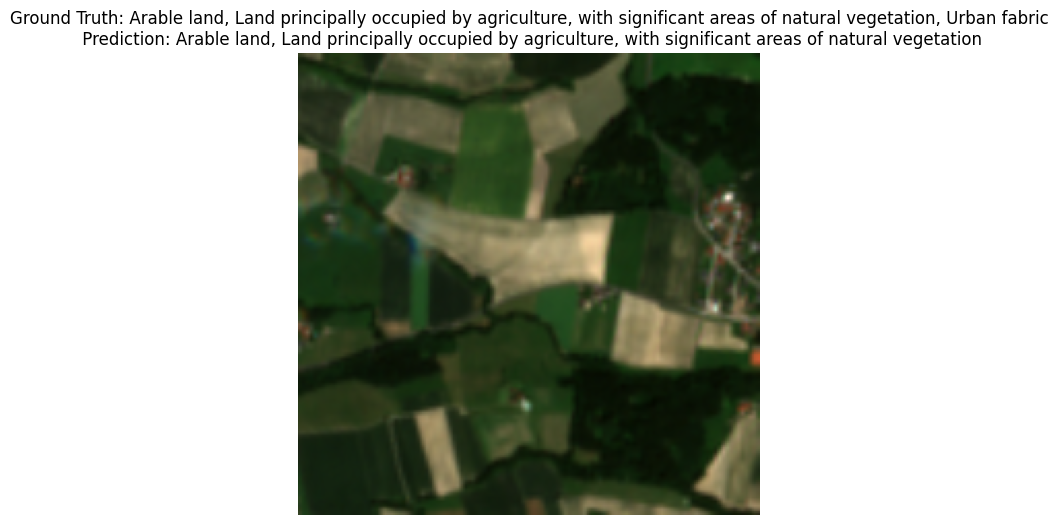

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import random
from torch.serialization import add_safe_globals
from timm.models.vision_transformer import VisionTransformer

# Luôn dùng CPU
device = torch.device("cpu")
print("Using device:", device)

# Load model EfficientNet đã huấn luyện (trên CPU)
# Bước 1: Cho phép VisionTransformer được load (nếu file chứa mô hình này)
add_safe_globals({'VisionTransformer': VisionTransformer})

# Bước 2: Load toàn bộ mô hình
model_path = "/kaggle/input/vit-for-bigearthnet-new/my_pytorch_model_bigearth_1.pth"
model = torch.load(model_path, map_location='cpu', weights_only=False)
model.eval()
print("Model loaded and moved to", device)

# Danh sách class BigEarthNet
class_list = [
    'Arable land',
    'Mixed forest',
    'Coniferous forest',
    'Transitional woodland, shrub',
    'Broad-leaved forest',
    'Land principally occupied by agriculture, with significant areas of natural vegetation',
    'Complex cultivation patterns',
    'Pastures',
    'Urban fabric',
    'Inland waters',
    'Marine waters',
    'Agro-forestry areas',
    'Permanent crops',
    'Inland wetlands',
    'Moors, heathland and sclerophyllous vegetation',
    'Natural grassland and sparsely vegetated areas',
    'Industrial or commercial units',
    'Coastal wetlands',
    'Beaches, dunes, sands'
]

# Hàm hiển thị prediction
def show_sample_prediction(dataset, index):
    image, true_labels = dataset[index]
    input_tensor = image.unsqueeze(0).to(device)  # (1, C, H, W)

    np.set_printoptions(suppress=True, precision=5)
    # Dự đoán
    with torch.no_grad():
        output = model(input_tensor)
        sigmoid_probs = torch.sigmoid(output.squeeze()).cpu().numpy()
        predicted = (sigmoid_probs > 0.7).astype(int)  # Sửa chỗ này

    # Hiển thị ma trận nhãn gốc và predicted
    print("True Labels (binary vector):\n", true_labels.numpy())
    print("Logits:\n", output.squeeze().cpu().numpy())
    print("Sigmoid(Logits):\n", np.array2string(sigmoid_probs, precision=5, suppress_small=True))
    print("Predicted Labels:\n", predicted)

    # Lấy tên nhãn
    true_label_names = [class_list[i] for i, val in enumerate(true_labels) if val == 1]
    predicted_label_names = [class_list[i] for i, val in enumerate(predicted) if val == 1]

    # Hiển thị ảnh (chọn RGB bands 4,3,2)
    img_np = image.cpu().numpy().transpose(1, 2, 0)
    rgb = img_np[:, :, [3, 2, 1]]  # Bands 4,3,2
    rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)  # Scale về [0,1]

    plt.figure(figsize=(6, 6))
    plt.imshow(rgb)
    plt.axis('off')
    plt.title("Ground Truth: {}\n Prediction: {}".format(", ".join(true_label_names), ", ".join(predicted_label_names)))
    plt.show()

# Hiển thị 5 mẫu random từ test_dataset
for _ in range(5):
    idx = random.randint(0, len(test_dataset) - 1)
    show_sample_prediction(test_dataset, idx)

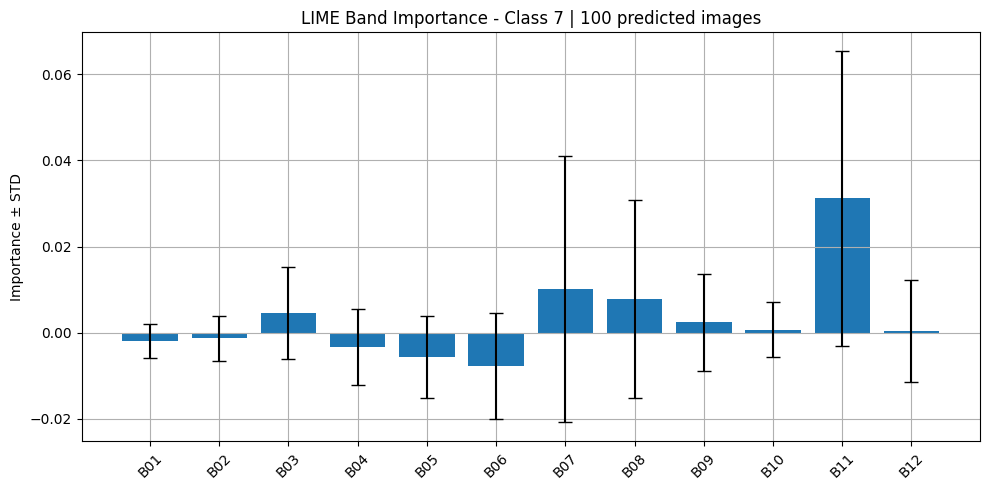

Số ảnh dự đoán class 7: 100
Mean base prob: 0.5509


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import timm
from sklearn.linear_model import LinearRegression

# ======= Load model ========
model_path = "/kaggle/input/vit-for-bigearthnet-new/my_pytorch_model_bigearth_1.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.load(model_path, map_location=device, weights_only=False)
model.eval()

# ======= Wrapper cho 1 class ========
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        out = self.base_model(x)
        return out[:, self.class_idx].unsqueeze(-1)  # (batch_size, 1)

# ======= LIME cho 1 ảnh, 1 class ========
def lime_multi_band_importance_class_model(class_model, image, num_samples=500, method='zero'):
    class_model.eval()
    image = image.to(device)

    with torch.no_grad():
        base_prob = torch.sigmoid(class_model(image.unsqueeze(0)))[0].item()

    C = image.shape[0]
    masks = []
    probs = []

    for _ in range(num_samples):
        band_mask = np.random.randint(0, 2, size=C)
        masked_image = image.clone()

        for i in range(C):
            if band_mask[i] == 0:
                if method == 'zero':
                    masked_image[i] = 0
                elif method == 'mean':
                    masked_image[i] = image[i].mean()

        with torch.no_grad():
            prob = torch.sigmoid(class_model(masked_image.unsqueeze(0)))[0].item()

        masks.append(band_mask)
        probs.append(prob)

    masks = np.array(masks)
    probs = np.array(probs)
    y = probs

    reg = LinearRegression()
    reg.fit(masks, y)
    band_importances = reg.coef_

    return band_importances, base_prob

# ======= Tổng quát hoá LIME cho nhiều ảnh được model dự đoán có class ========
def lime_summary_for_predicted_class(base_model, dataset, class_idx, max_images, num_samples, method='zero'):
    class_model = MultiLabelModel(base_model, class_idx).to(device)
    class_model.eval()

    importances_list = []
    base_probs = []
    count = 0

    for i in range(len(dataset)):
        image, label = dataset[i]
        image = image.to(device).unsqueeze(0)

        with torch.no_grad():
            output = torch.sigmoid(base_model(image))[0]
            pred_prob = output[class_idx].item()

        if pred_prob <= 0.5:
            continue  # Chỉ lấy ảnh model dự đoán class_idx > 0.5

        band_importances, base_prob = lime_multi_band_importance_class_model(
            class_model, image.squeeze(0), num_samples=num_samples, method=method
        )
        importances_list.append(band_importances)
        base_probs.append(base_prob)

        count += 1
        if count >= max_images:
            break

    if not importances_list:
        print(f"Không tìm thấy ảnh nào mà mô hình dự đoán class {class_idx}")
        return

    importances_array = np.stack(importances_list, axis=0)
    mean_importance = np.mean(importances_array, axis=0)
    std_importance = np.std(importances_array, axis=0)
    band_names = [f'B{i+1:02d}' for i in range(mean_importance.shape[0])]

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 5))
    plt.bar(band_names, mean_importance, yerr=std_importance, capsize=5)
    plt.title(f"LIME Band Importance - Class {class_idx} | {count} predicted images")
    plt.xticks(rotation=45)
    plt.ylabel("Importance ± STD")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Số ảnh dự đoán class {class_idx}: {count}")
    print(f"Mean base prob: {np.mean(base_probs):.4f}")

# ======= Gọi hàm cho class i ========
lime_summary_for_predicted_class(
    base_model=model,
    dataset=test_dataset,
    # Đổi class_idx theo index của list nhãn
    class_idx=7,
    max_images=300,
    num_samples=300,
    method='zero'
)

In [ ]:
import torch
import numpy as np
from sklearn.metrics import (
    classification_report, precision_recall_fscore_support, average_precision_score
)
from sklearn.metrics import (
    classification_report, multilabel_confusion_matrix, roc_auc_score,
    precision_recall_fscore_support, average_precision_score,
    hamming_loss, accuracy_score, precision_score, recall_score,
    f1_score, jaccard_score, roc_curve, precision_recall_curve, auc
)

# Giả sử test_loader và model đã có sẵn
# Class 0 là "Arable land", tương ứng index = 0
# class_list là danh sách tên lớp theo thứ tự

def evaluate_model_mask_band8(model, dataloader, device, threshold=0.5):
    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in dataloader:
            # Mask toàn bộ band 8 (index 7 vì bắt đầu từ 0)
            images[:, 5, :, :] = 0.0

            images = images.to(device)
            labels = labels.to(device)
            outputs = torch.sigmoid(model(images))

            all_preds.append(outputs.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    y_true = np.vstack(all_labels)
    y_scores = np.vstack(all_preds)
    y_pred = (y_scores >= threshold).astype(int)

    return y_true, y_scores, y_pred

# === Chạy đánh giá ===
y_true, y_scores, y_pred = evaluate_model_mask_band8(model, test_loader, device)

# === Đánh giá riêng class 0 (Arable land) ===
class_idx = 7  # class "Arable land"

# Precision, Recall, F1 cho class 0
precision_0 = precision_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
recall_0 = recall_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
f1_0 = f1_score(y_true[:, class_idx], y_pred[:, class_idx], zero_division=0)
support_0 = int(np.sum(y_true[:, class_idx]))

# === In kết quả ===
print(f"\nClass 7 - {class_list[class_idx]}")
print(f"Precision: {precision_0:.2f}")
print(f"Recall:    {recall_0:.2f}")
print(f"F1-Score:  {f1_0:.2f}")
print(f"Support:   {support_0}")


Class 7 - Pastures
Precision: 0.20
Recall:    1.00
F1-Score:  0.34
Support:   3102


In [ ]:
# ✅ Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm

# # Luôn dùng CPU
# device = torch.device("cpu")
# print("Using device:", device)

# # Load model ViT đã huấn luyện (trên CPU)
# model_path = "/content/drive/MyDrive/Document for Capstone/Model/Vit_Bigearthnet_mAP.pth"
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 0  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = self.base_model(x)
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs, _ = next(iter(test_loader))
# background_imgs = background_imgs[:8].to(device)
background_imgs = background_imgs[:5].to(device)  # chỉ lấy 5 ảnh background

test_imgs, _ = next(iter(test_loader))
# test_imgs = test_imgs[:8].to(device)
test_imgs = test_imgs[0:1].to(device)  # chỉ lấy 1 ảnh để explain

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"🔎 Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

🔎 Calculating SHAP for class 0 ...


True labels:     [1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted probs: [0.994 0.204 0.885 0.012 0.004 0.589 0.519 0.271 0.217 0.013 0.    0.
 0.001 0.002 0.    0.    0.005 0.    0.   ]
Predicted labels: [1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
Class 0 probability: 0.9944
True Labels (binary vector):
 [1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Logits:
 [  5.17977  -1.36192   2.04459  -4.425    -5.64743   0.35829   0.07621
  -0.98773  -1.28039  -4.36783 -10.59946 -11.61357  -7.25338  -6.42229
  -8.4077  -10.89799  -5.28563 -17.43534 -11.51279]
Sigmoid(Logits):
 [0.9944  0.20393 0.8854  0.01183 0.00351 0.58863 0.51904 0.27136 0.21748
 0.01252 0.00002 0.00001 0.00071 0.00162 0.00022 0.00002 0.00504 0.
 0.00001]
Predicted Labels:
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


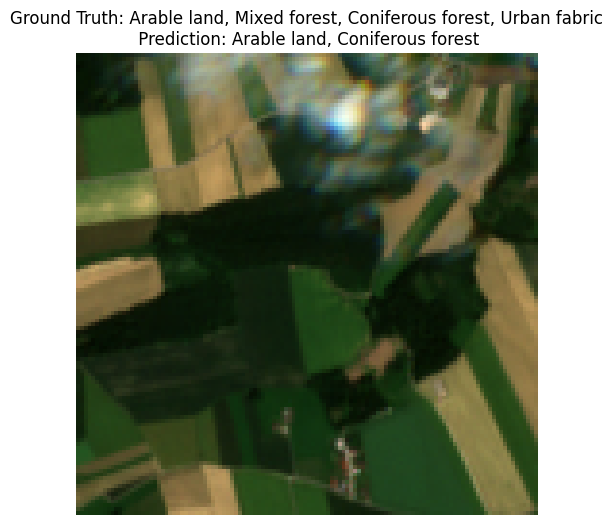

Calculating SHAP for class 0 ...


In [ ]:
# Import thư viện
import torch
import torch.nn as nn
import shap
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm import tqdm
import timm

# # Luôn dùng CPU
device = torch.device("cpu")
model.to(device)
# print("⚡ Using device:", device)

# # Load model ViT đã huấn luyện (trên CPU)
# model_path = "/content/drive/MyDrive/Document for Capstone/Model/Vit_Bigearthnet_mAP.pth"
# model = torch.load(model_path, map_location=device, weights_only=False)
# model.eval()
# print("Model loaded and moved to", device)

# Wrapper model cho 1 class
class_idx = 0  # Thay class bạn muốn xem (0-18)
class MultiLabelModel(nn.Module):
    def __init__(self, base_model, class_idx):
        super().__init__()
        self.base_model = base_model
        self.class_idx = class_idx

    def forward(self, x):
        logits = self.base_model(x)
        return logits[:, self.class_idx].unsqueeze(-1)  # shape (batch, 1)

class_model = MultiLabelModel(model, class_idx).to(device)

# Background & test images
background_imgs, _ = next(iter(test_loader))
background_imgs = background_imgs[:5].to(device)  # chỉ lấy 5 ảnh background

# test_imgs, test_labels = next(iter(test_loader))
# test_imgs = test_imgs[1:2].to(device)  # chỉ lấy 1 ảnh để explain
# test_labels = test_labels[0]            # shape (19,)
test_imgs, test_labels = test_dataset[60]
test_imgs = test_imgs.unsqueeze(0).to(device)  # thêm batch dim

# Dự đoán cho ảnh được chọn
with torch.no_grad():
    logits = model(test_imgs)
    probs = torch.sigmoid(logits).cpu().squeeze()  # shape (19,)
    preds = (probs > 0.5).int()  # threshold 0.5


# Hiển thị true label và predicted label
print("True labels:    ", test_labels.numpy())
print("Predicted probs:", np.round(probs.numpy(), 3))
print("Predicted labels:", preds.numpy())
print(f"Class {class_idx} probability: {probs[class_idx]:.4f}")

show_sample_prediction(test_loader.dataset, 60)

# GradientExplainer
explainer = shap.GradientExplainer(class_model, background_imgs)

# Tính SHAP values
print(f"Calculating SHAP for class {class_idx} ...")
shap_values = explainer.shap_values(test_imgs)

shap_array shape: (12, 120, 120)
mean_shap_per_band shape: (12,)


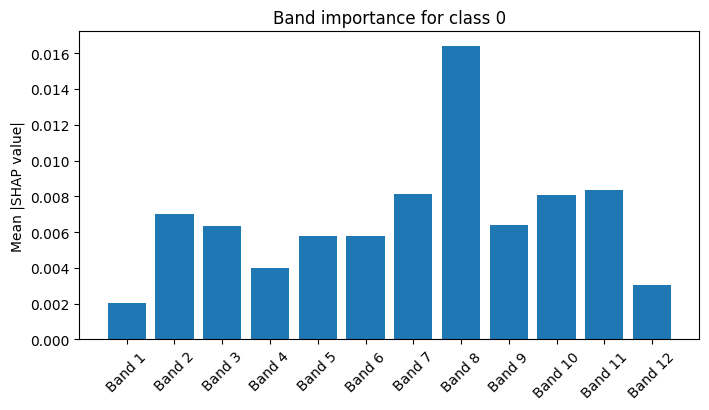

In [ ]:
# Remove chiều dư (nếu có)
shap_array = np.array(shap_values[0])
shap_array = np.squeeze(shap_array)  # (12, 224, 224)
print("shap_array shape:", shap_array.shape)

# Tính mean SHAP value theo H, W
mean_shap_per_band = np.abs(shap_array).mean(axis=(1, 2))  # shape (12,)
print("mean_shap_per_band shape:", mean_shap_per_band.shape)

# Vẽ bar chart
plt.figure(figsize=(8, 4))
plt.bar(np.arange(1, 13), mean_shap_per_band)
plt.xticks(np.arange(1, 13), [f'Band {i}' for i in range(1, 13)], rotation=45)
plt.ylabel('Mean |SHAP value|')
plt.title(f'Band importance for class {class_idx}')
plt.show()


Glyph 128293 (\N{FIRE}) missing from current font.
Glyph 128293 (\N{FIRE}) missing from current font.


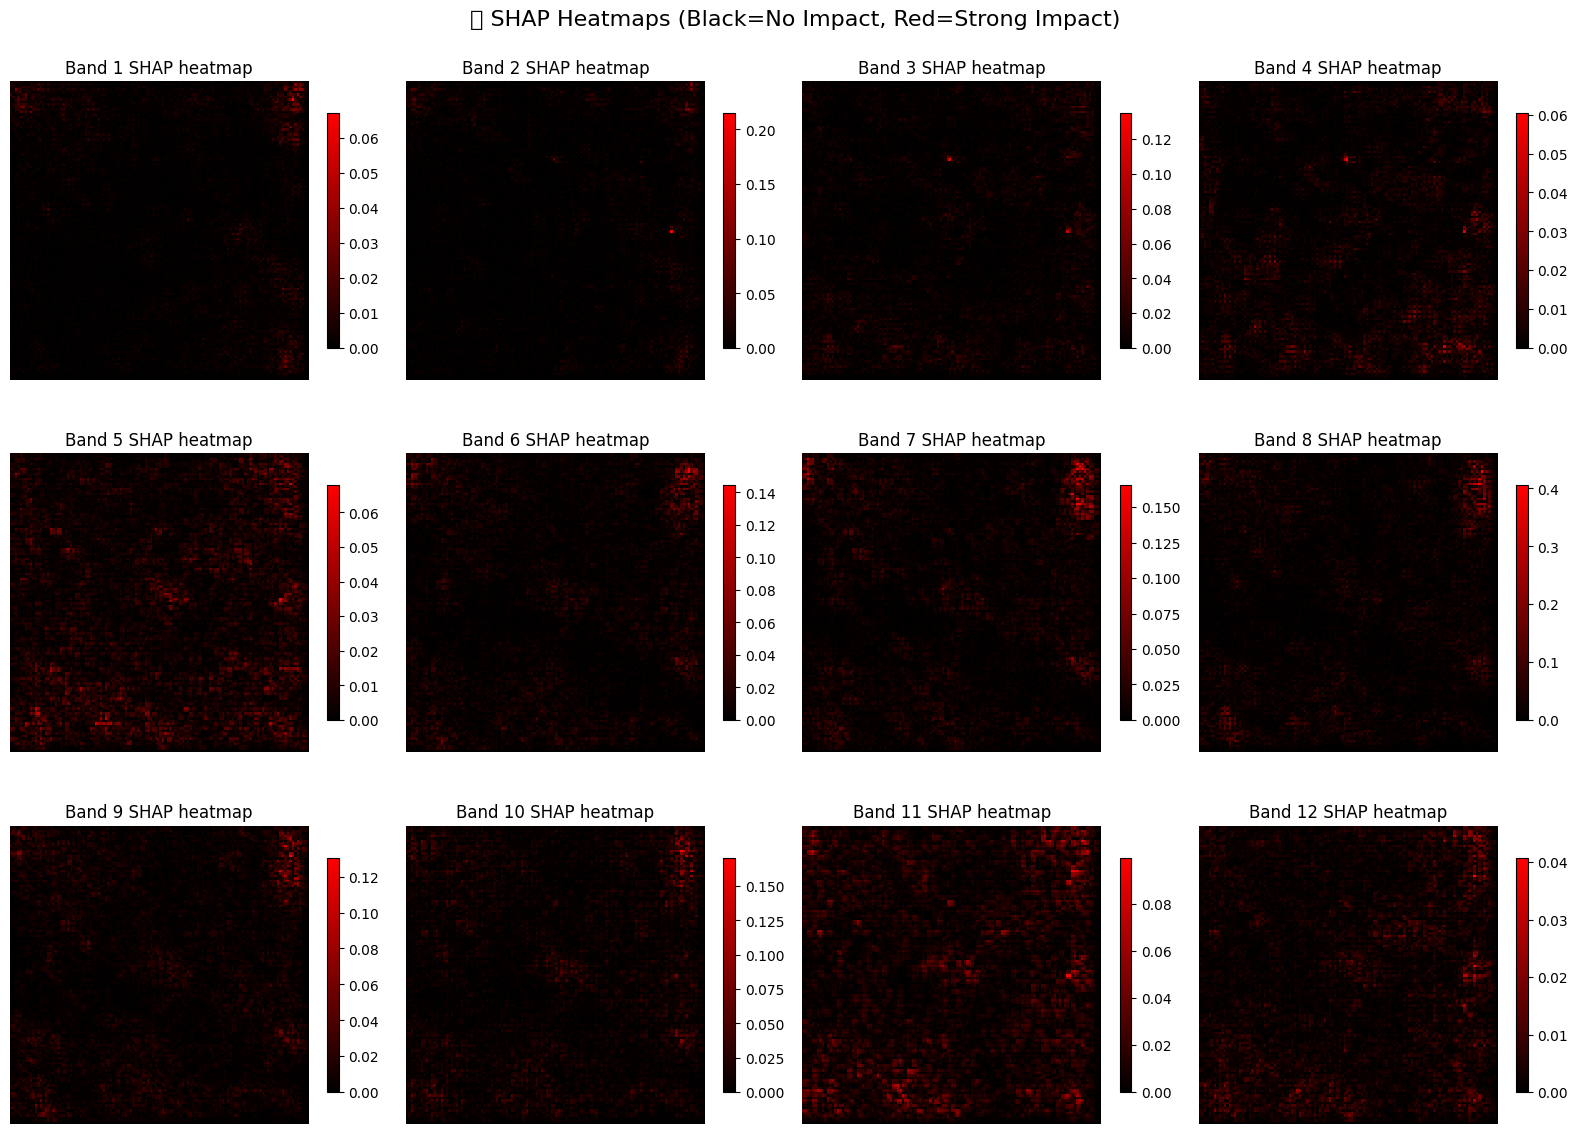

In [ ]:
import matplotlib.colors as mcolors

# Lấy array từ shap_values
shap_array = shap_values[0]  # shape: (12, H, W)

# Tạo custom colormap: black (0) -> red (high)
cmap = mcolors.LinearSegmentedColormap.from_list("black_red", ["black", "red"])

# Hiển thị heatmap cho từng band
num_bands = shap_array.shape[0]
fig, axes = plt.subplots(3, 4, figsize=(16, 12))  # 3 rows x 4 cols
axes = axes.flatten()

for i in range(num_bands):
    ax = axes[i]
    heatmap = np.abs(shap_array[i])  # lấy trị tuyệt đối cho impact

    im = ax.imshow(heatmap, cmap=cmap, interpolation='nearest')
    ax.set_title(f"Band {i+1} SHAP heatmap", fontsize=12)
    ax.axis('off')
    fig.colorbar(im, ax=ax, shrink=0.6)

plt.suptitle("🔥 SHAP Heatmaps (Black=No Impact, Red=Strong Impact)", fontsize=16)
plt.tight_layout()
plt.show()


🔥 Band 8 có mean |SHAP| cao nhất


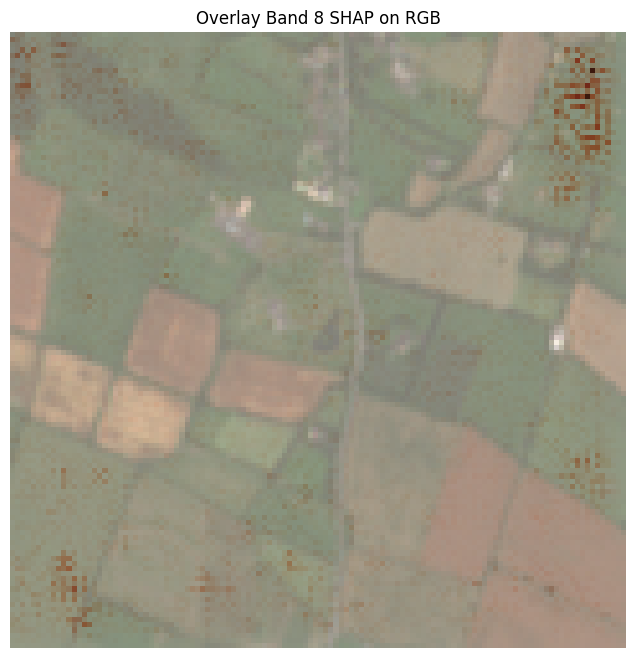

In [ ]:
# ✅ Lấy ảnh gốc
image_np = test_imgs.squeeze().cpu().numpy().transpose(1, 2, 0)  # (H, W, C)
rgb = image_np[:, :, [3, 2, 1]]  # Bands 4,3,2 (gần giống RGB)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min() + 1e-6)  # scale về [0,1]

# ✅ Tìm band có mean |SHAP| cao nhất
mean_shap_per_band = np.abs(shap_array).mean(axis=(1, 2))  # shape (12,)
top_band_idx = np.argmax(mean_shap_per_band)
print(f"🔥 Band {top_band_idx+1} có mean |SHAP| cao nhất")

# ✅ Lấy heatmap của band đó và scale
heatmap = np.abs(shap_array[top_band_idx])  # (H, W)
heatmap_norm = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-6)  # scale 0-1

# ✅ Overlay heatmap lên ảnh gốc
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.imshow(heatmap_norm, cmap="Reds", alpha=0.5)  # alpha=0.5 để thấy ảnh gốc
plt.axis('off')
plt.title(f"Overlay Band {top_band_idx+1} SHAP on RGB")
plt.show()
